<a href="https://colab.research.google.com/github/ananthapadmanabhan-o/Metro_failure_detection/blob/main/metro_failure_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta


# Loading Dataset

In [ ]:
df = pd.read_csv('MetroPT3(AirCompressor).csv')
df

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516943,15169430,2020-09-01 03:59:10,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516944,15169440,2020-09-01 03:59:20,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516945,15169450,2020-09-01 03:59:30,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516946,15169460,2020-09-01 03:59:40,-0.012,8.876,8.864,-0.022,8.878,59.550,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

# Dtypes

In [ ]:
df.dtypes

timestamp           object
TP2                float64
TP3                float64
H1                 float64
DV_pressure        float64
Reservoirs         float64
Oil_temperature    float64
Motor_current      float64
COMP               float64
DV_eletric         float64
Towers             float64
MPG                float64
LPS                float64
Pressure_switch    float64
Oil_level          float64
Caudal_impulses    float64
dtype: object

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp',inplace=True)

# Describe

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TP2,1516948.0,1.367826,3.250930,-0.032,-0.014,-0.012,-0.0100,10.676
TP3,1516948.0,8.984611,0.639095,0.730,8.492,8.960,9.4920,10.302
H1,1516948.0,7.568155,3.333200,-0.036,8.254,8.784,9.3740,10.288
DV_pressure,1516948.0,0.055956,0.382402,-0.032,-0.022,-0.020,-0.0180,9.844
Reservoirs,1516948.0,8.985233,0.638307,0.712,8.494,8.960,9.4920,10.300
Oil_temperature,1516948.0,62.644182,6.516261,15.400,57.775,62.700,67.2500,89.050
Motor_current,1516948.0,2.050171,2.302053,0.020,0.040,0.045,3.8075,9.295
COMP,1516948.0,0.836957,0.369405,0.000,1.000,1.000,1.0000,1.000
DV_eletric,1516948.0,0.160611,0.367172,0.000,0.000,0.000,0.0000,1.000
Towers,1516948.0,0.919848,0.271528,0.000,1.000,1.000,1.0000,1.000


In [ ]:
df.isna().sum()

TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64

# Number Unique values

In [ ]:
df.nunique()

TP2                5257
TP3                3683
H1                 2665
DV_pressure        2257
Reservoirs         3682
Oil_temperature    2462
Motor_current      1809
COMP                  2
DV_eletric            2
Towers                2
MPG                   2
LPS                   2
Pressure_switch       2
Oil_level             2
Caudal_impulses       2
dtype: int64

# Numerical and Categorical Features

In [ ]:
numerical_features = ['TP2','TP3','H1','DV_pressure','Reservoirs','Oil_temperature','Motor_current']
categorical_features = ['COMP','DV_eletric','Towers','MPG','LPS','Pressure_switch','Oil_level','Caudal_impulses']

# Time of Failures

In [ ]:
failure_time = [
    ('2020-04-18 00:00:00', '2020-04-18 23:59:00'),
    ('2020-05-29 23:30:00', '2020-05-30 06:00:00'),
    ('2020-06-05 10:00:00', '2020-06-07 14:30:00'),
    ('2020-07-15 14:30:00', '2020-07-15 19:00:00')
]

failure_time = [(pd.to_datetime(time[0]),pd.to_datetime(time[1])) for time in failure_time]


In [ ]:
failure_time

[(Timestamp('2020-04-18 00:00:00'), Timestamp('2020-04-18 23:59:00')),
 (Timestamp('2020-05-29 23:30:00'), Timestamp('2020-05-30 06:00:00')),
 (Timestamp('2020-06-05 10:00:00'), Timestamp('2020-06-07 14:30:00')),
 (Timestamp('2020-07-15 14:30:00'), Timestamp('2020-07-15 19:00:00'))]

In [ ]:
df['status'] = 0
for i in range(4):
    n = 0
    start = failure_time[i][n]
    end = failure_time[i][n+1]
    df.loc[start:end, 'status'] = 1


# Imbalace of Dataset

In [ ]:
df.status.value_counts()

0    1486994
1      29954
Name: status, dtype: int64

<Axes: >

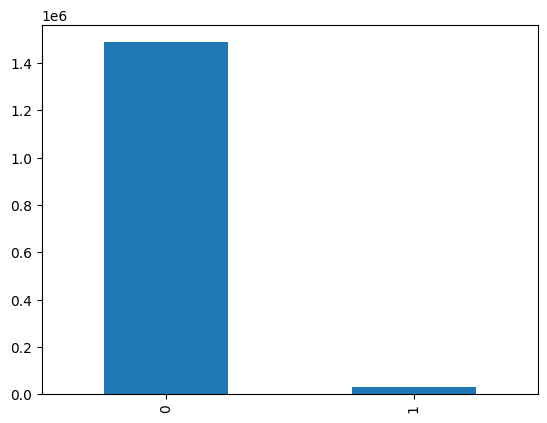

In [ ]:
df.status.value_counts().plot(kind='bar')

# Normal condition of analoge sensors

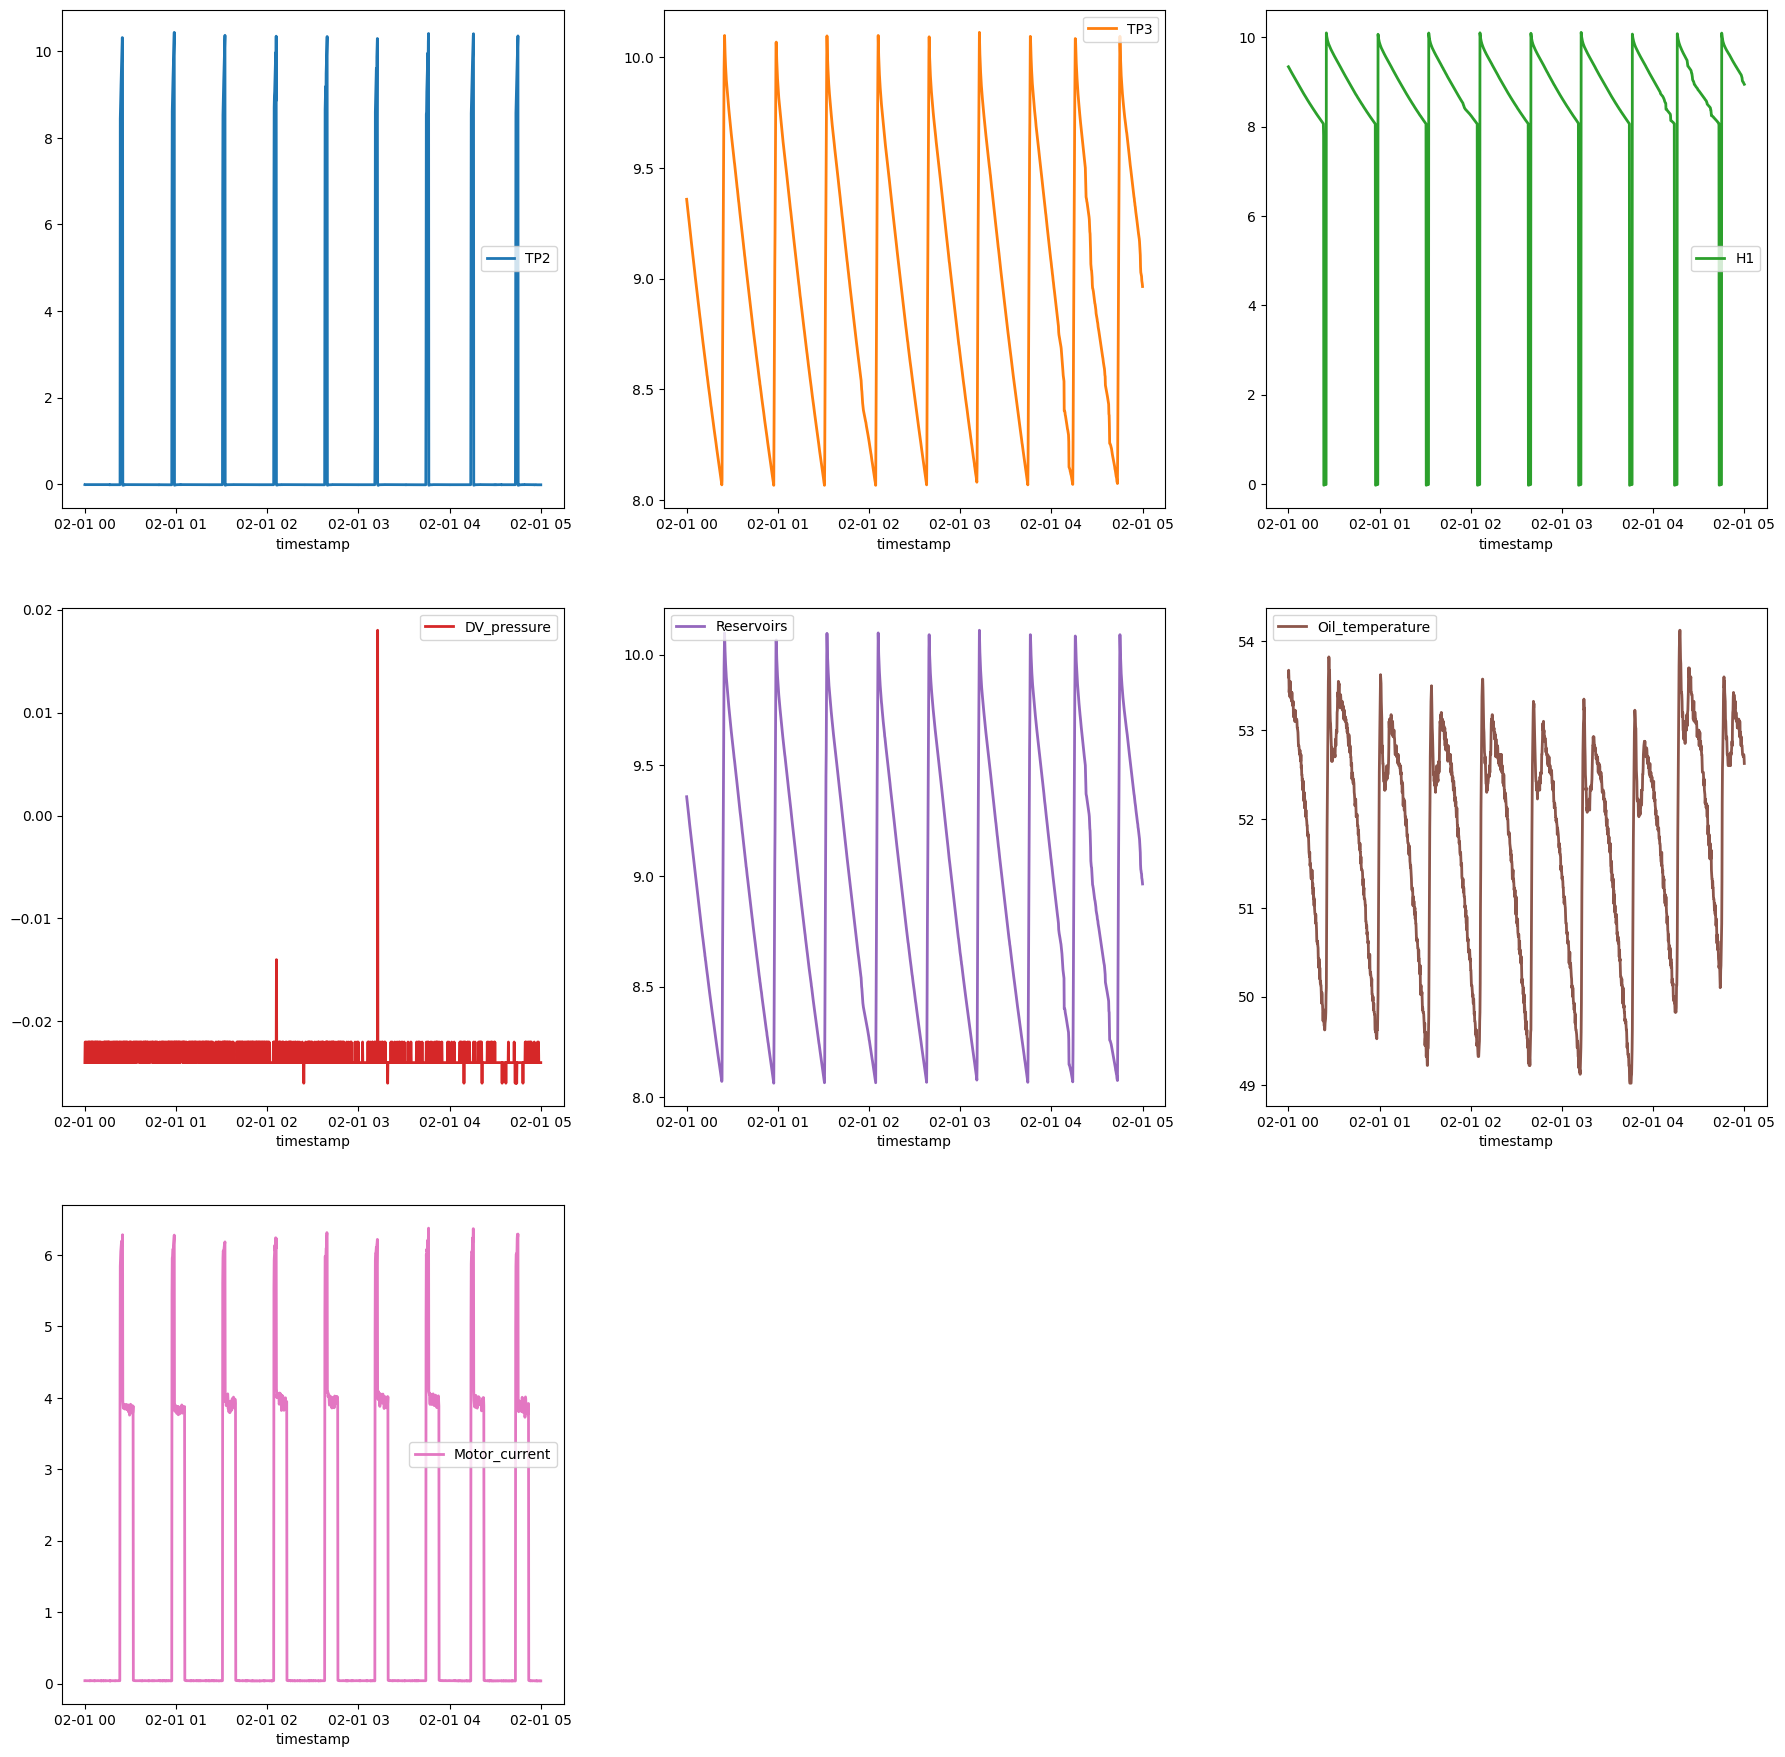

In [ ]:

ct_signal = df.loc[pd.to_datetime('2020-02-01 00:00:00'):pd.to_datetime('2020-02-01 05:00:00'),numerical_features]

ct_signal.plot(subplots=True,
        layout=(3, 3),
        figsize=(22,22),
        fontsize=10,
        linewidth=2,
        sharex=False
            )
plt.show()

# Normal Condition of Digital Sensors

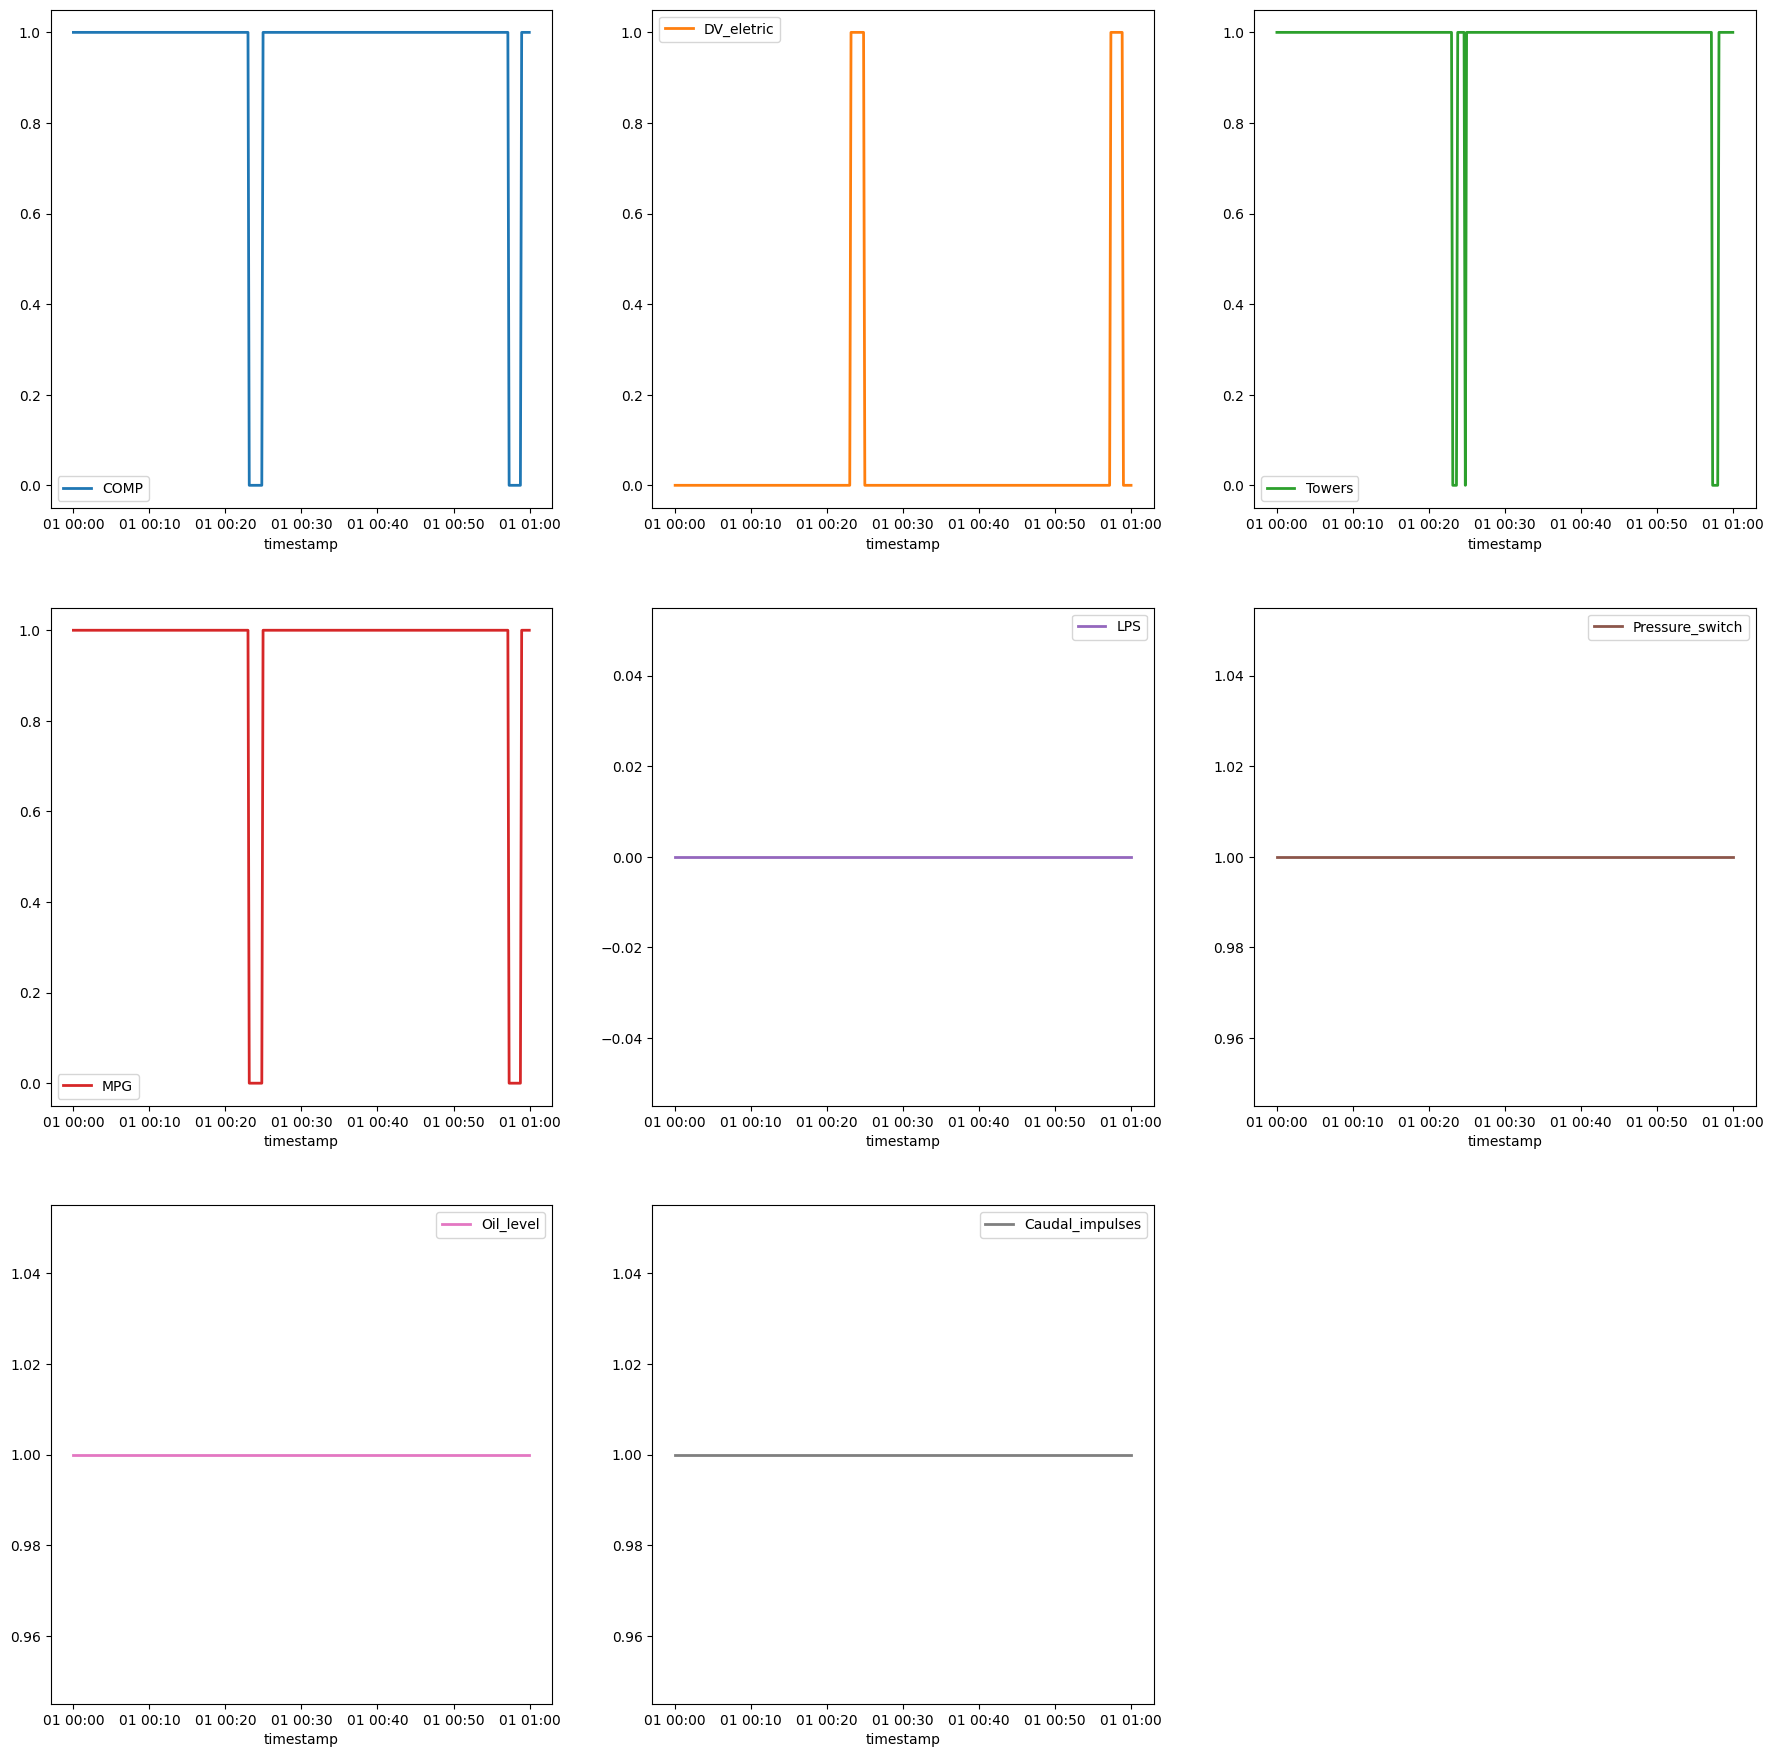

In [ ]:

dt_signal = df.loc[pd.to_datetime('2020-02-01 00:00:00'):pd.to_datetime('2020-02-01 01:00:00'),categorical_features]

dt_signal.plot(subplots=True,
        layout=(3, 3),
        figsize=(22,22),
        fontsize=10,
        linewidth=2,
        sharex=False,
            )
plt.show()

# Graph of each failure of sensors

In [ ]:
def plot_failure(col):

    d = {}

    for i in range(4):
        n = 0
        start = failure_time[i][n]
        end = failure_time[i][n+1]
        col_df = df.loc[start:end , col]
        d[f'failure{i+1}'] = col_df


    tp2_failure_df = pd.DataFrame(d)

    tp2_failure_df.plot(subplots = True,
                        layout=(1,4),
                        figsize=(15,4),
                        fontsize=10,
                        linewidth=2,
                        sharex=False,
                        title = col
                       )
    plt.show()

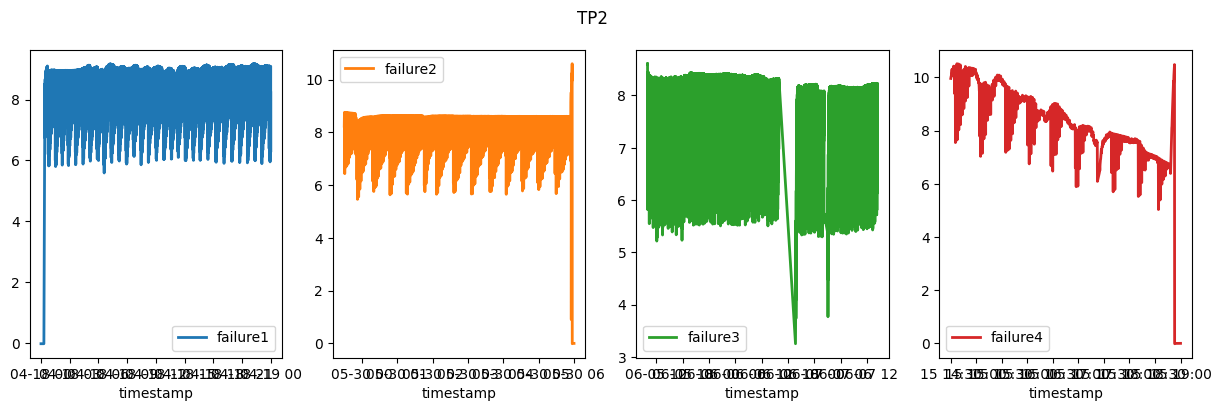

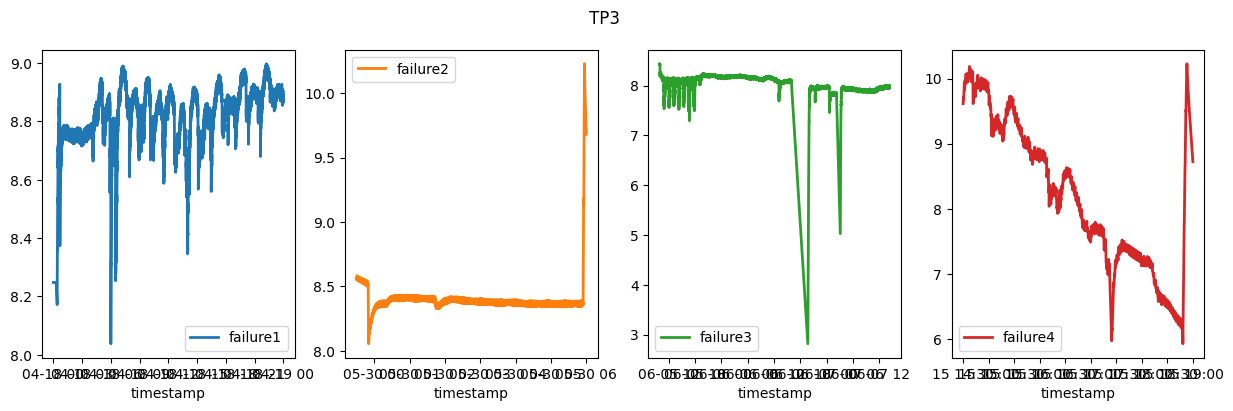

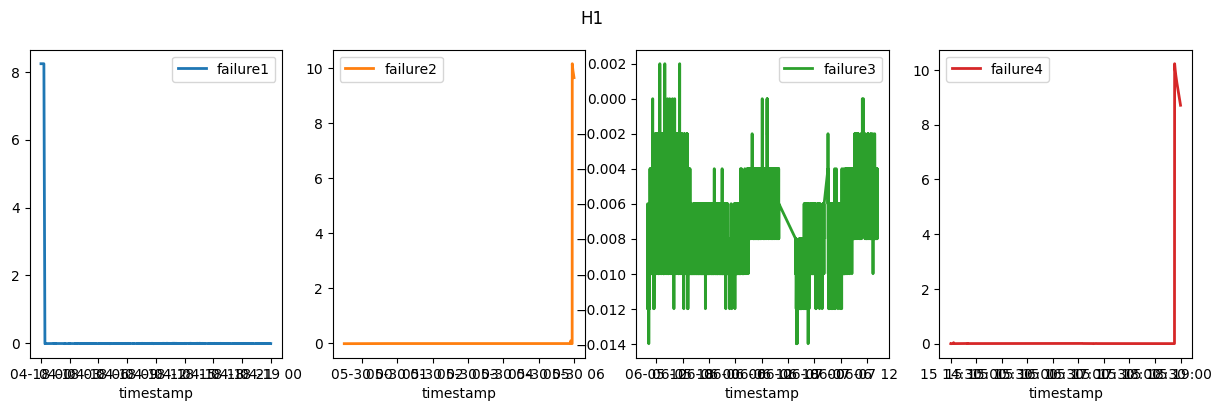

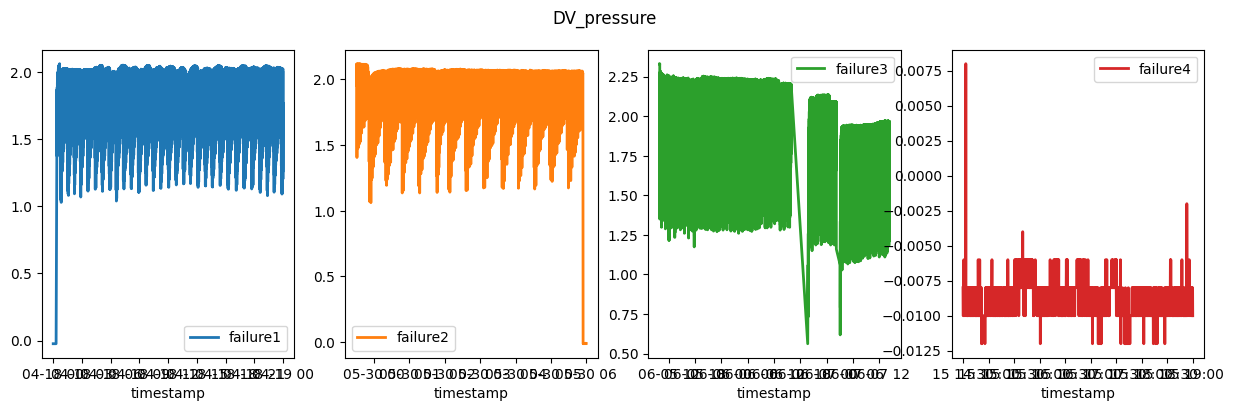

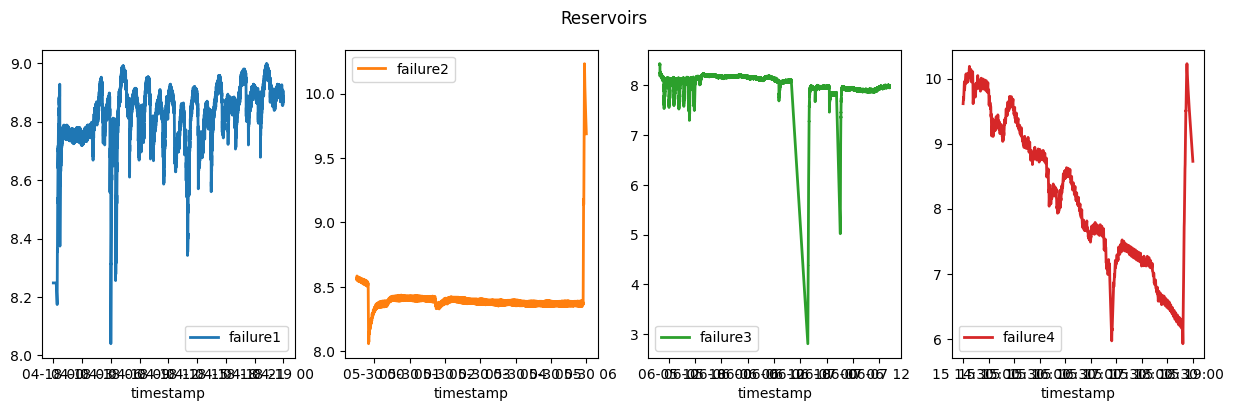

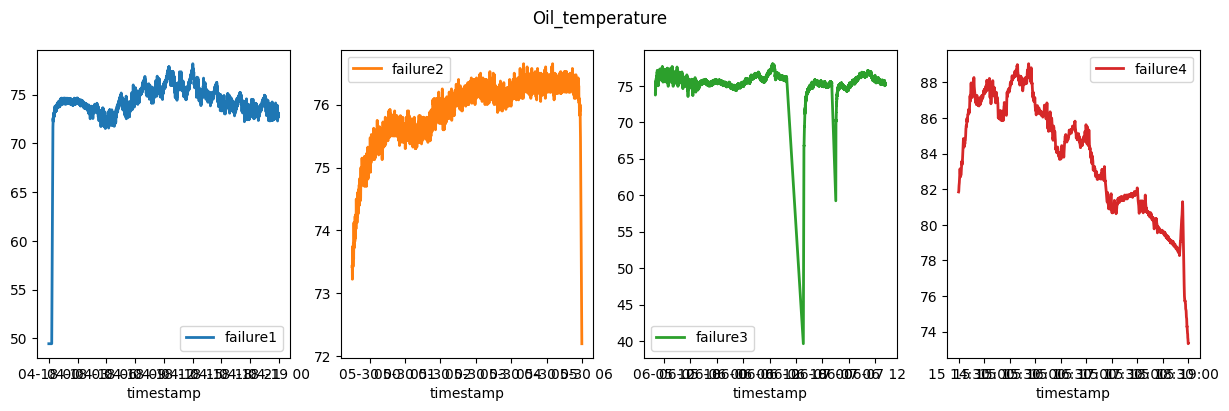

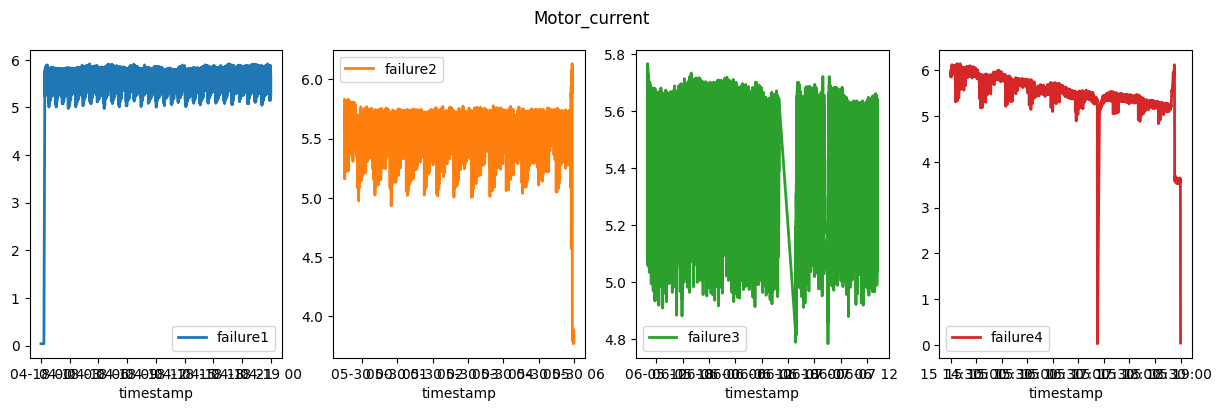

In [ ]:
for col in numerical_features:
    plot_failure(col)

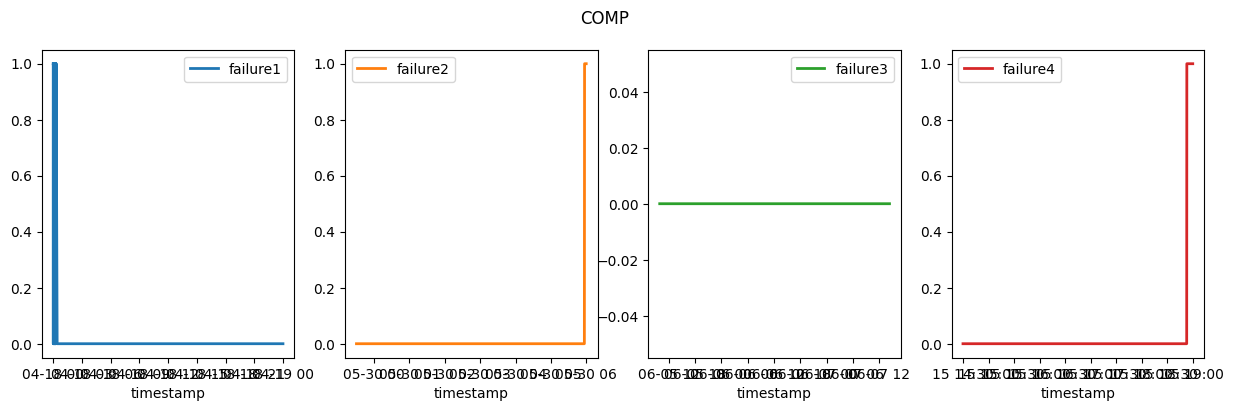

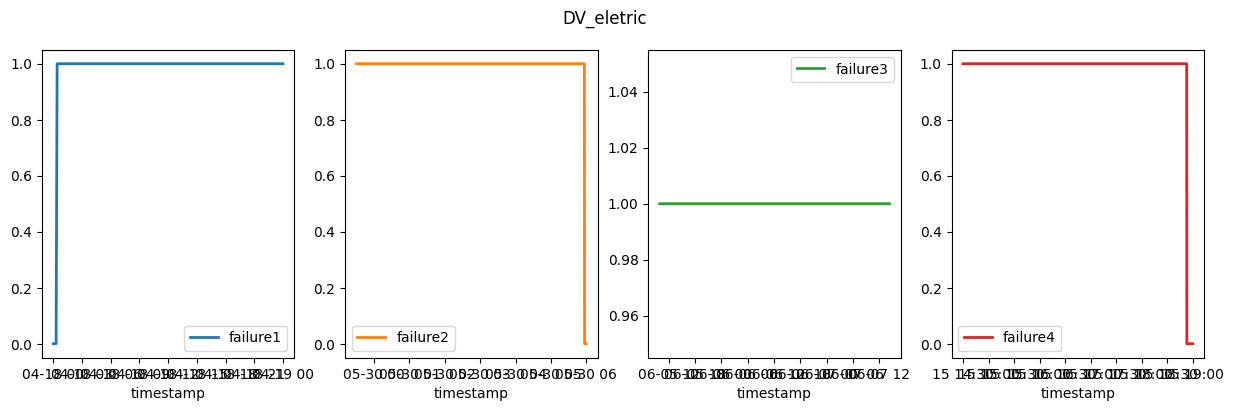

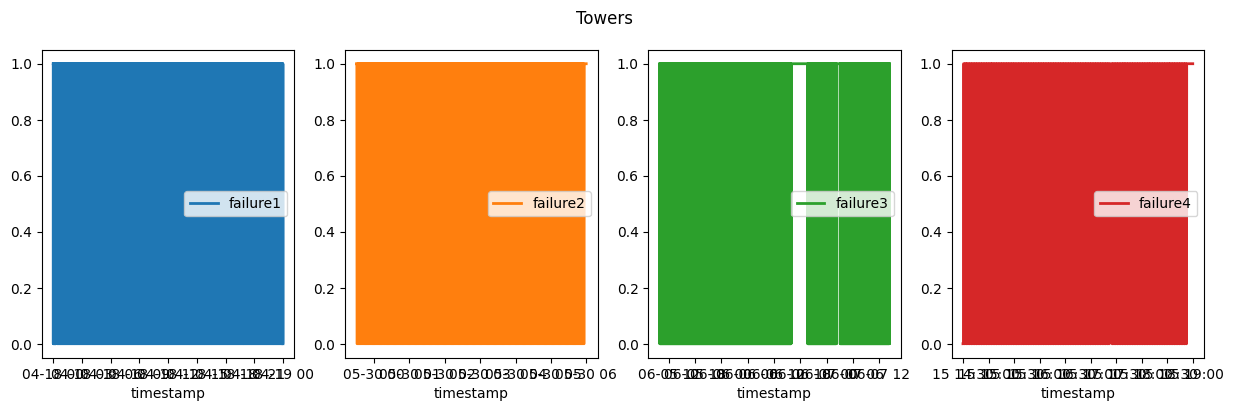

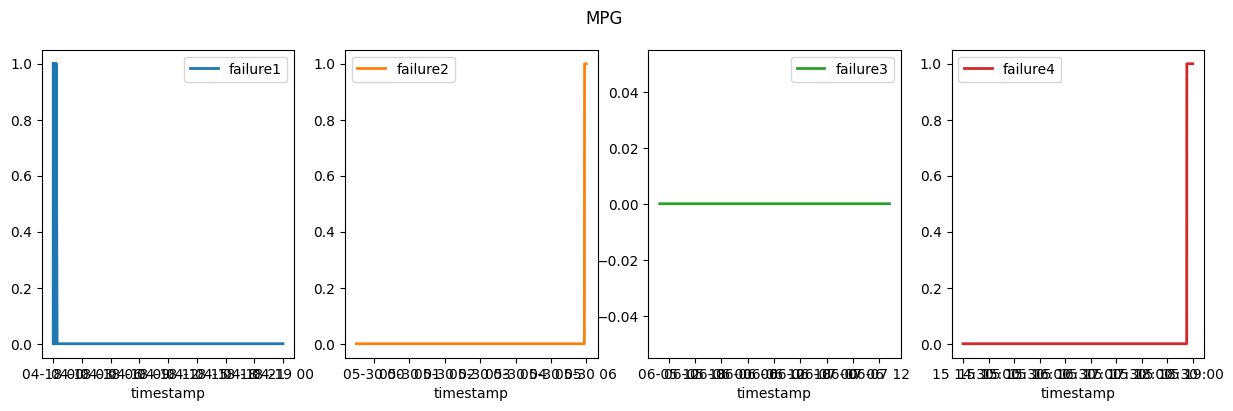

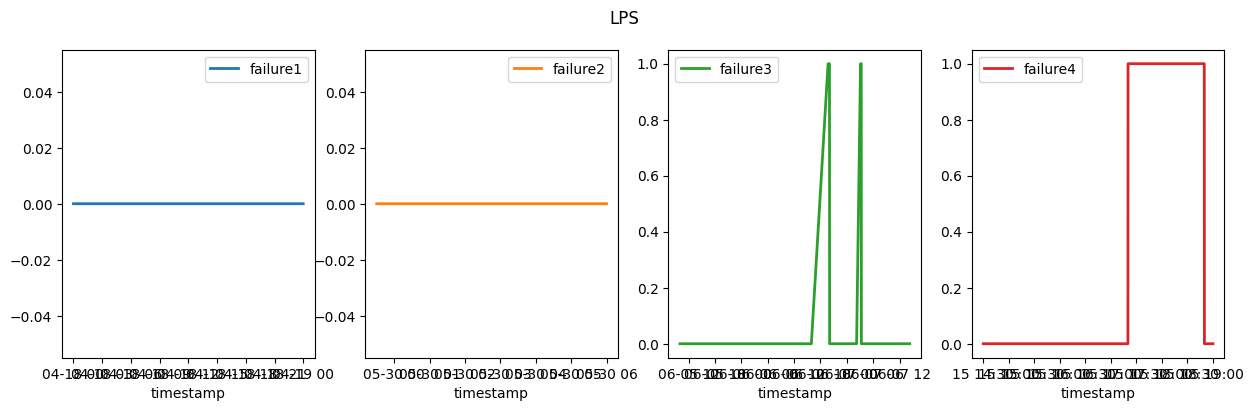

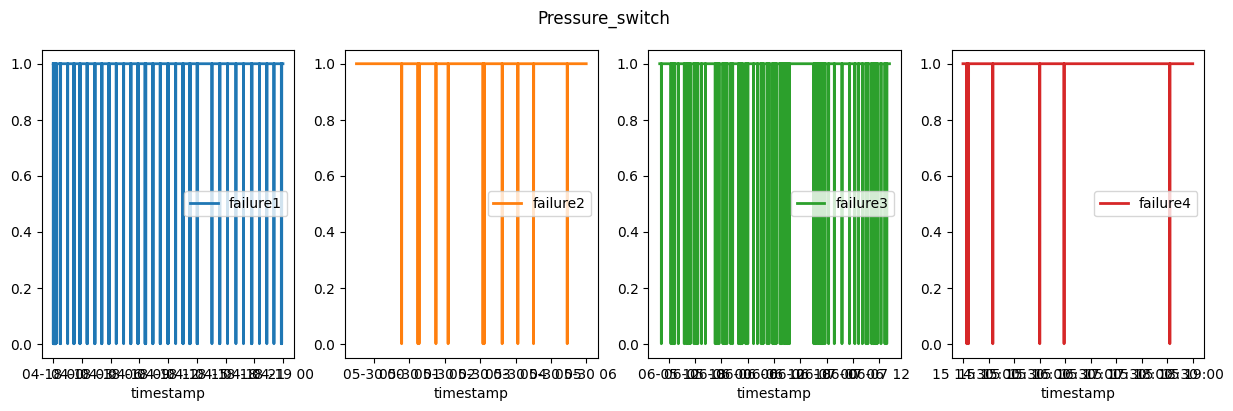

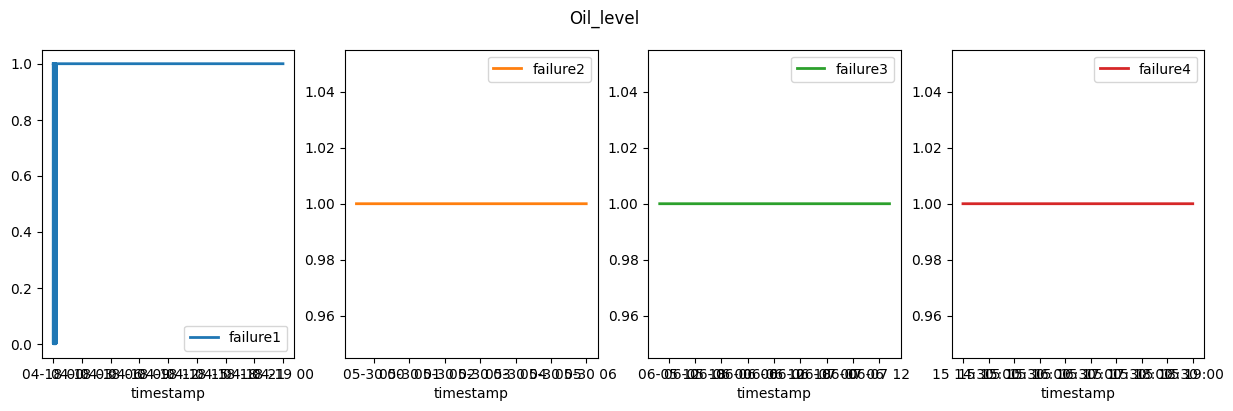

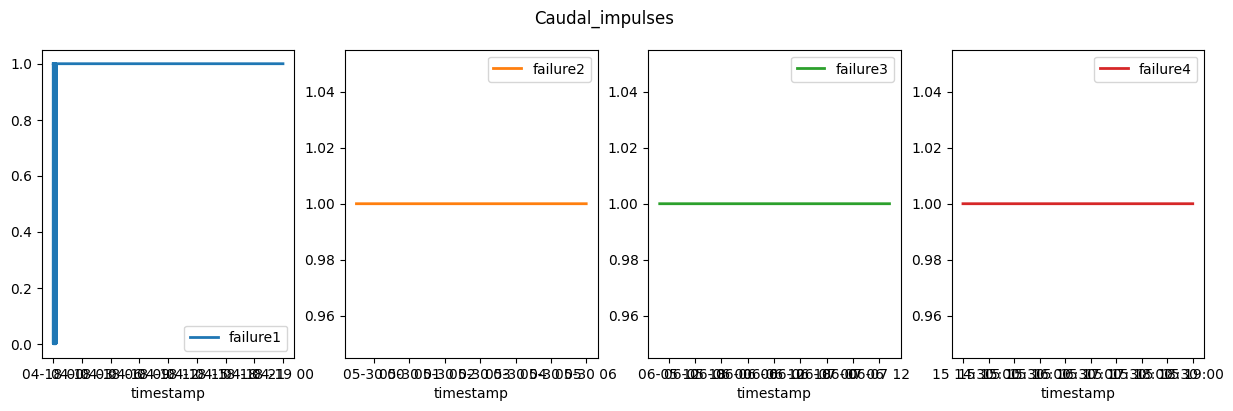

In [ ]:
for col in categorical_features:
    plot_failure(col)

# Graph of data before and after failure

In [ ]:
def plot_df_failure_range(start,hour,col):
    delta = pd.Timedelta(hours=hour)
    plt.figure(figsize=(10,4))
    data = df.loc[(start-delta):(start+delta),:]
    sns.lineplot(data=data,x='timestamp',y=col,hue='status',linewidth=2)
    plt.title(col)
    plt.xticks(rotation=44)
    plt.show()



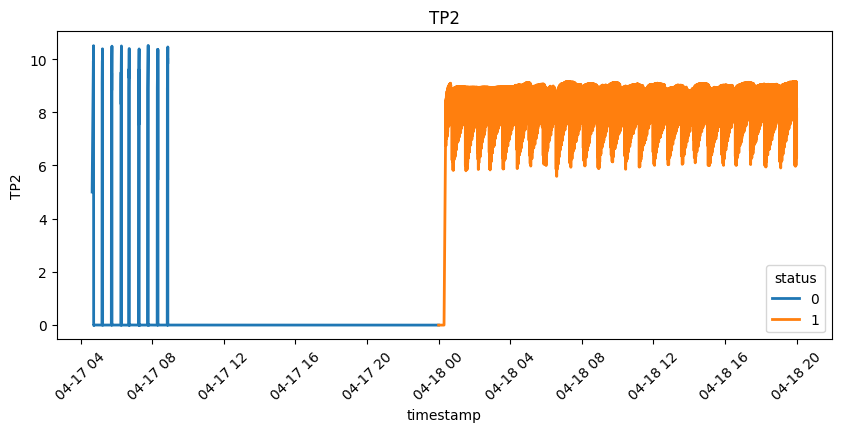

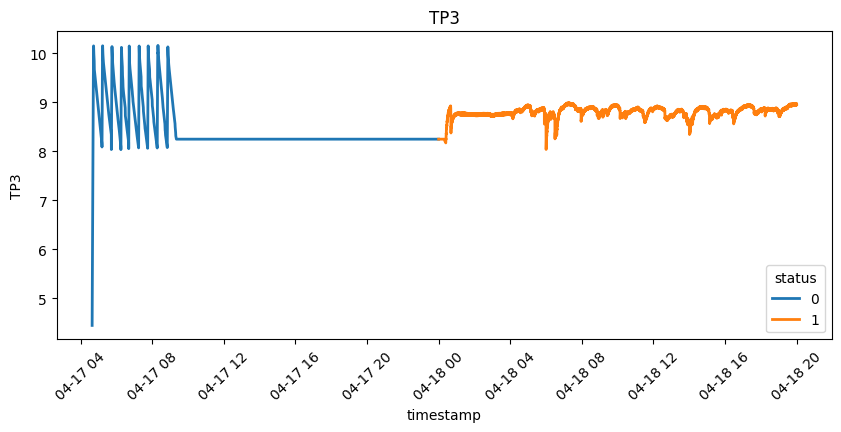

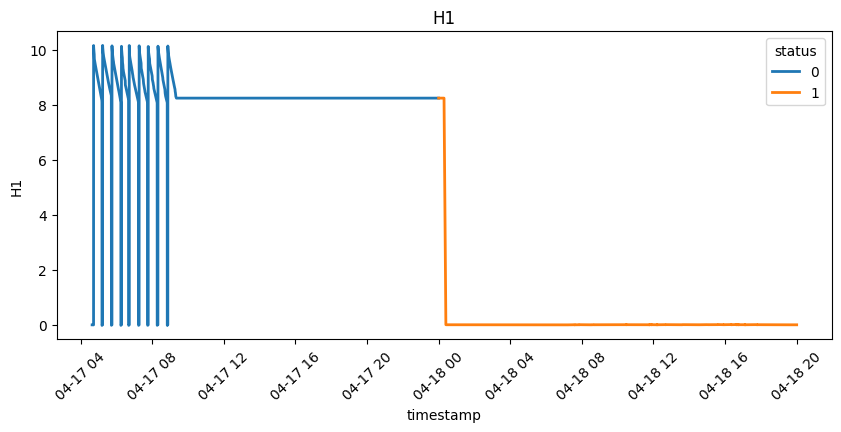

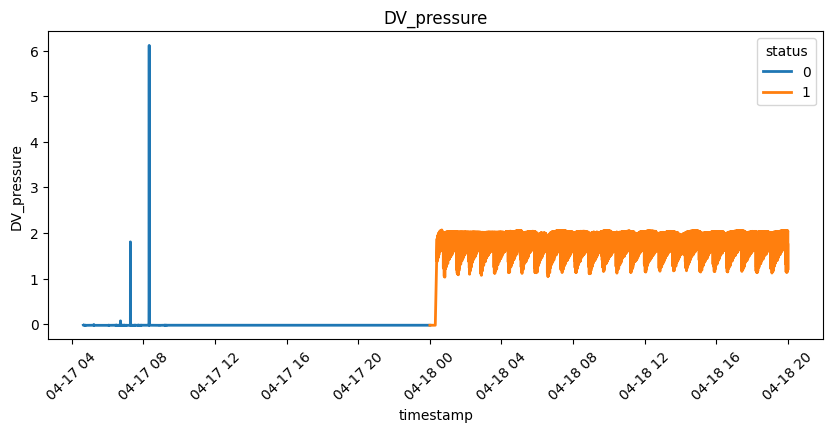

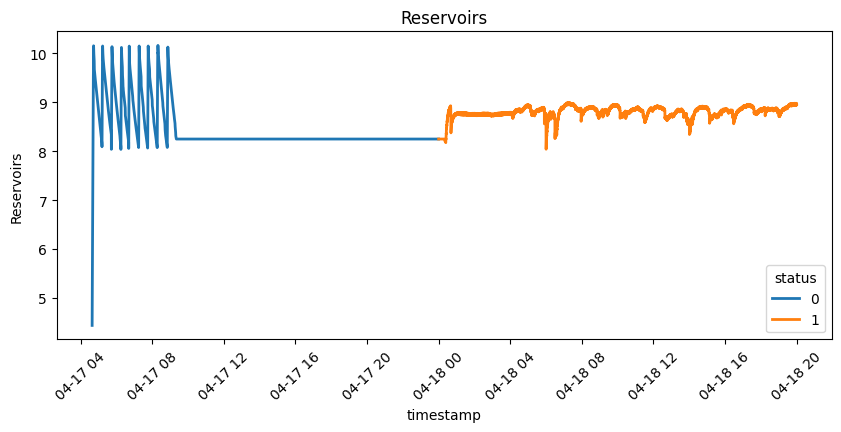

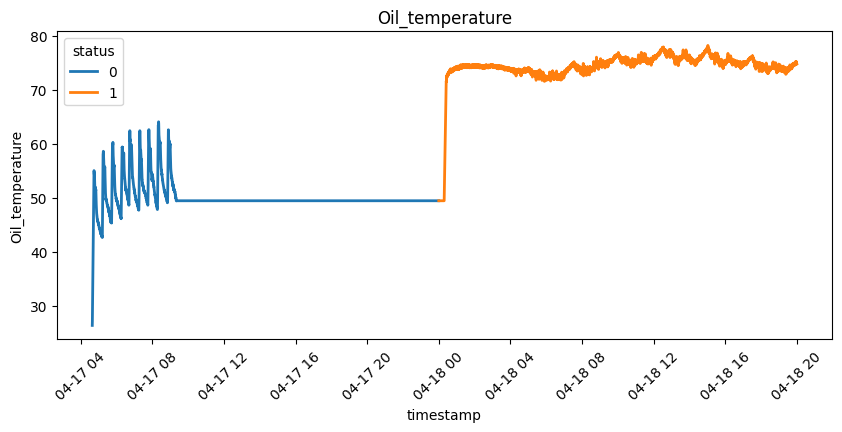

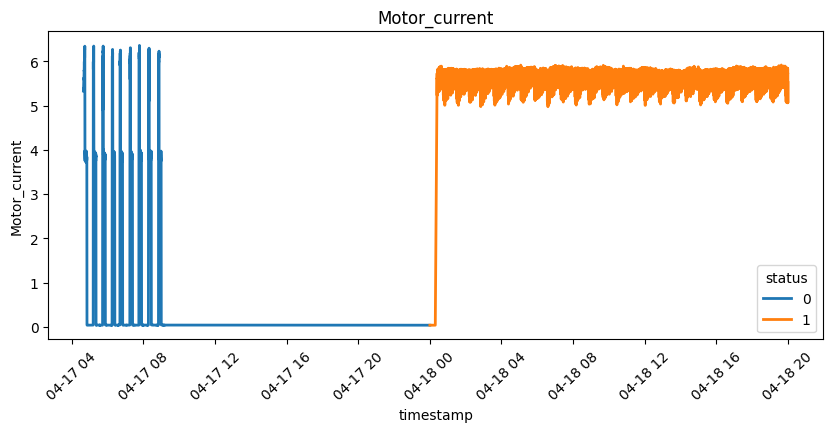

In [ ]:
for col in numerical_features:
    plot_df_failure_range(failure_time[0][0],20,col)

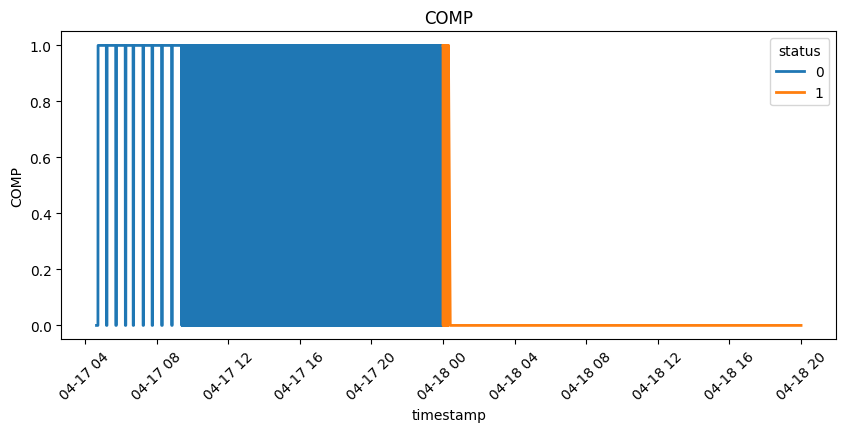

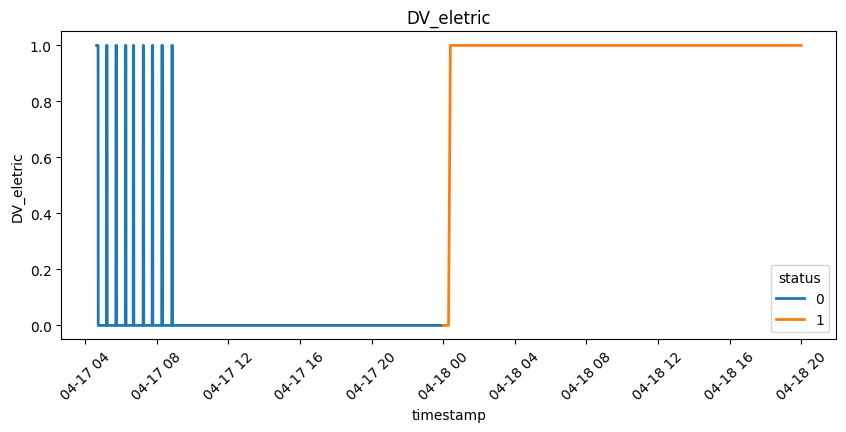

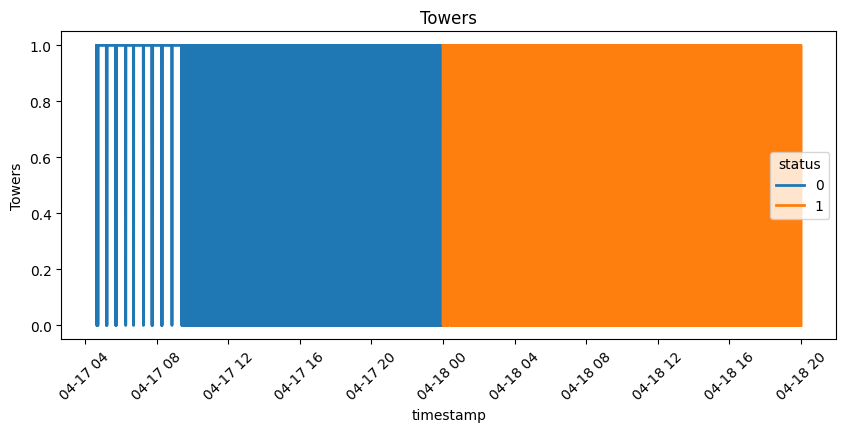

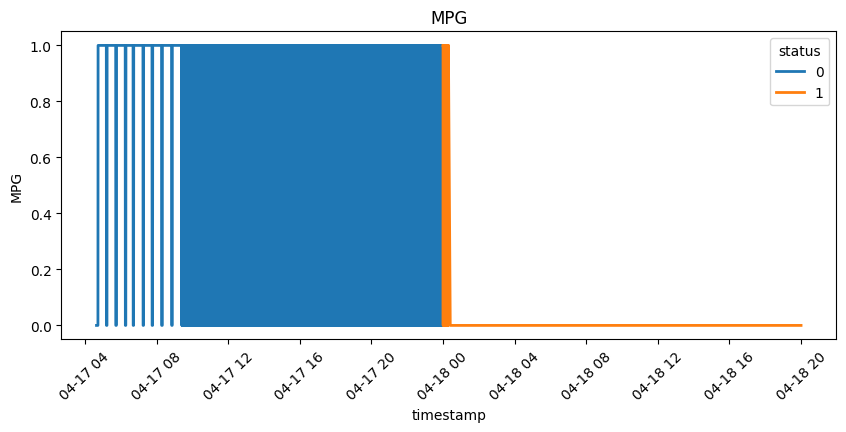

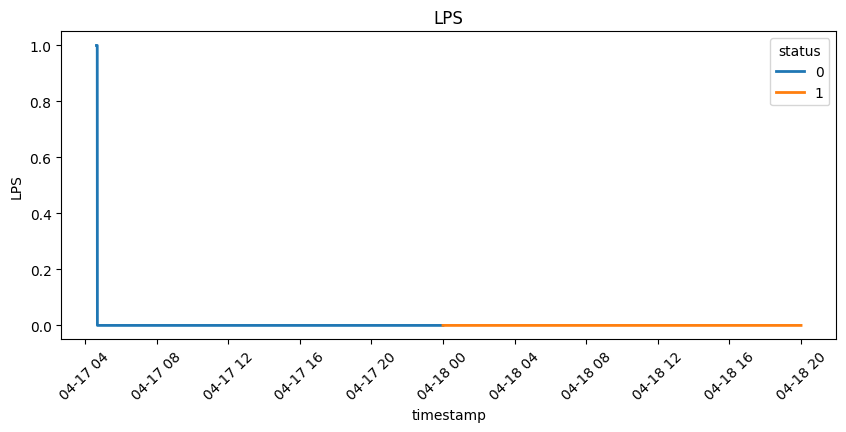

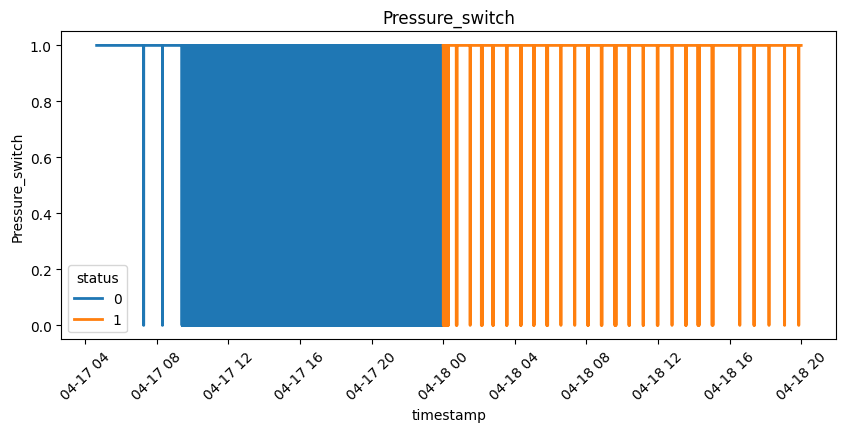

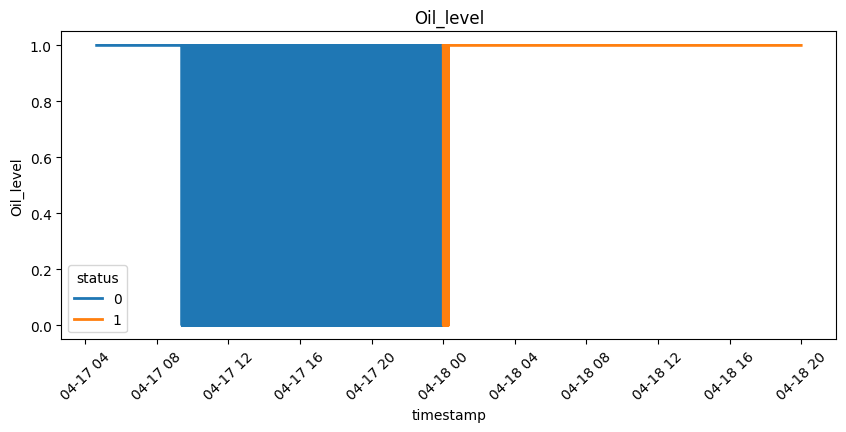

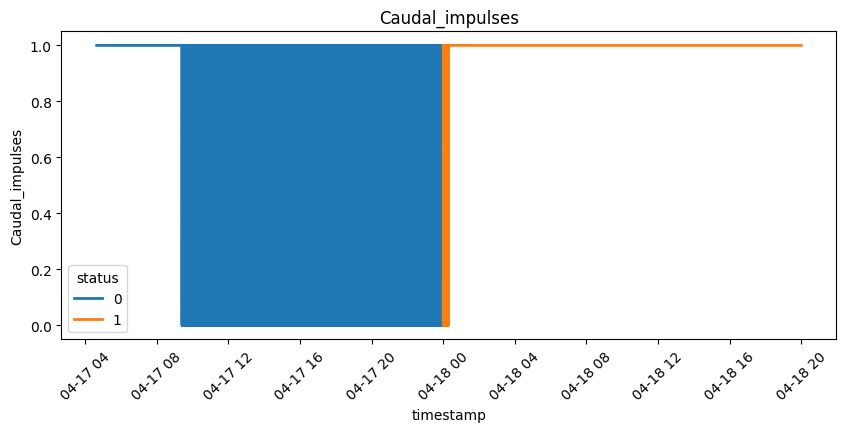

In [ ]:
for col in categorical_features:
    plot_df_failure_range(failure_time[0][0],20,col)

# Correlation

In [ ]:
df_corr = df.corr(numeric_only=True)

<Axes: >

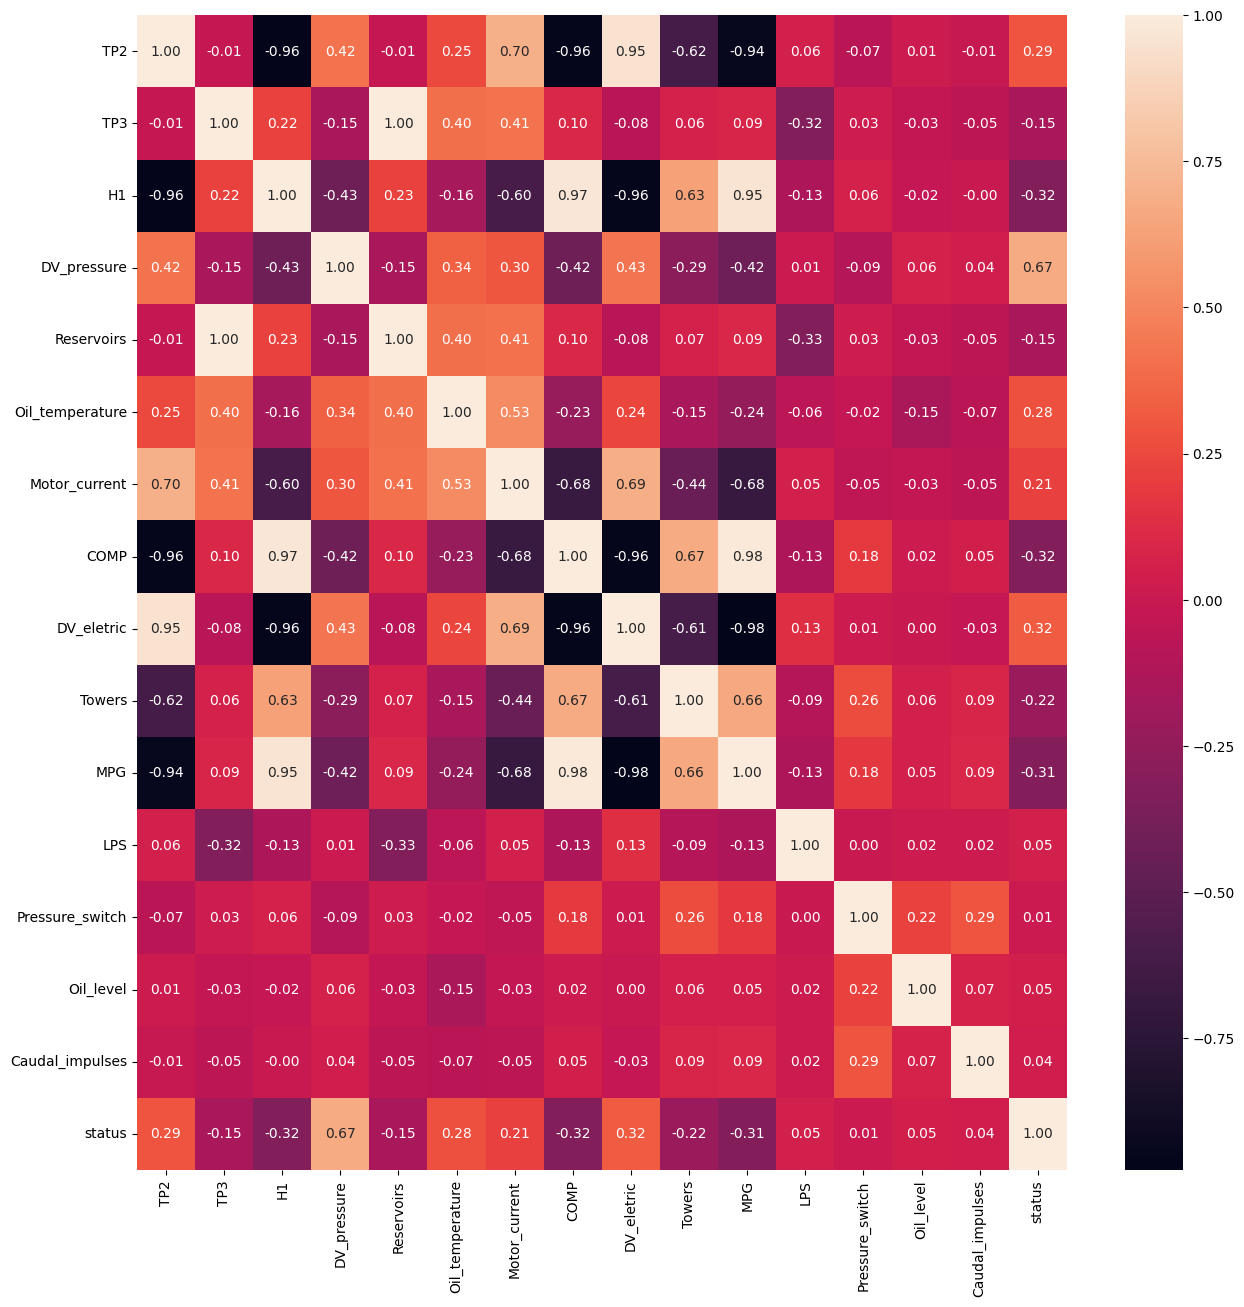

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df_corr,annot=True,fmt='0.2f')

# smoothening of signal

In [ ]:
smooth_df = df.ewm(alpha=0.005).mean()
smooth_df['status'] = df['status']

smooth_df_corr = smooth_df.corr()

<Axes: >

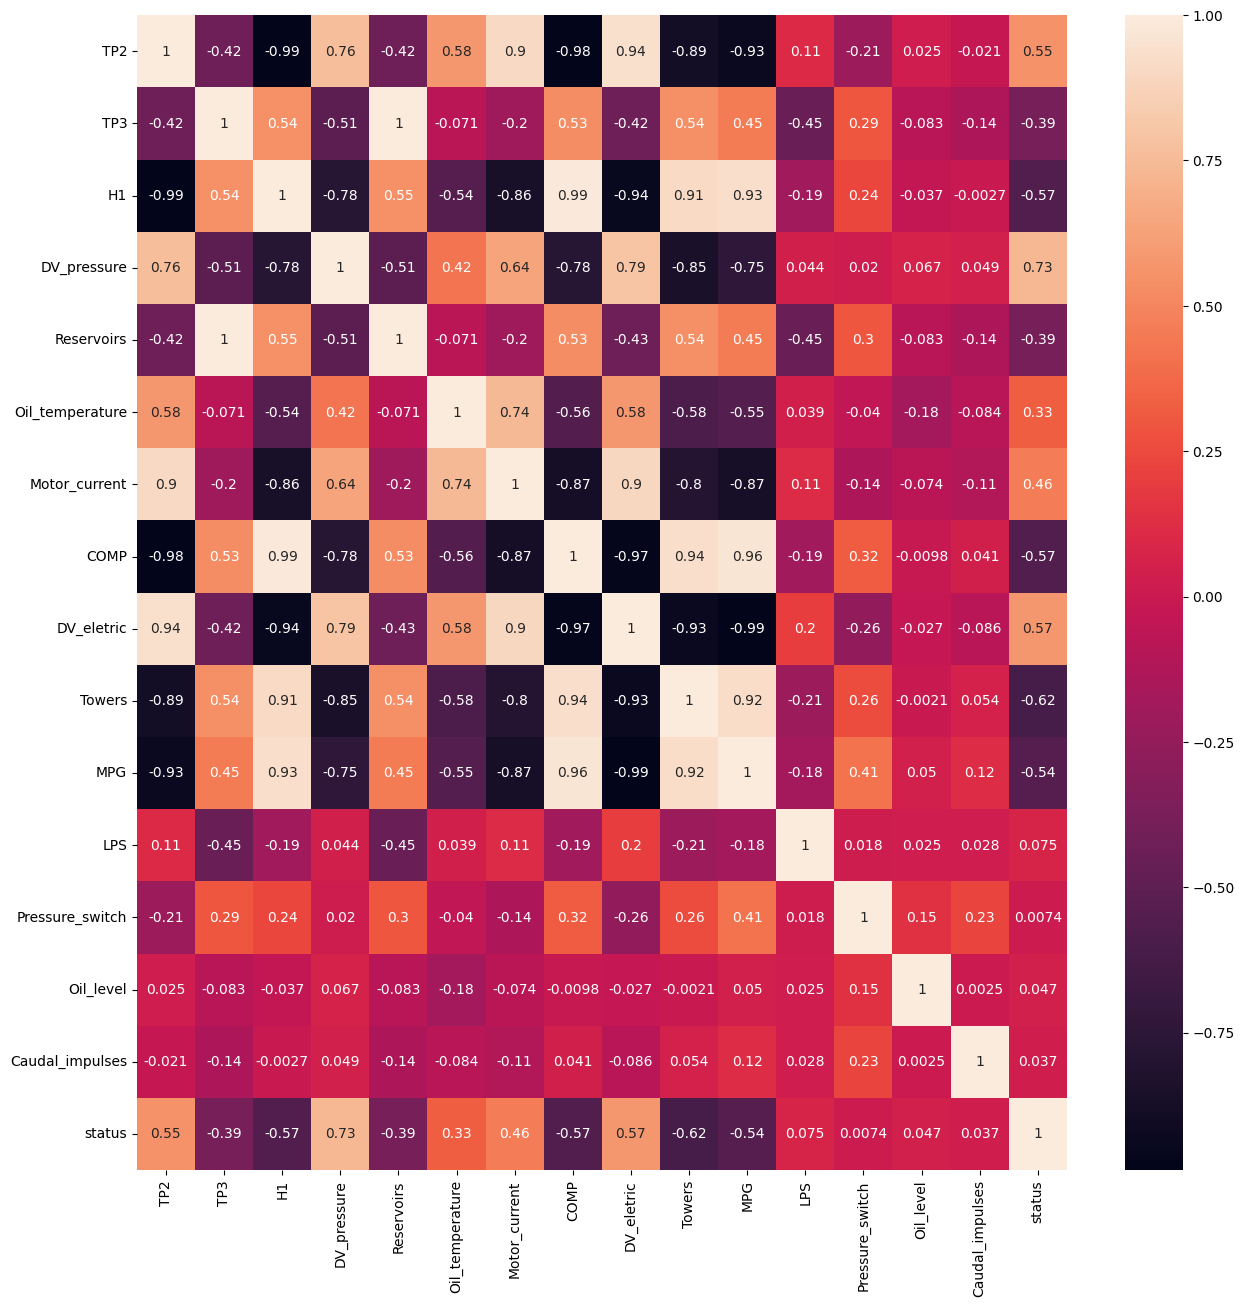

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(smooth_df_corr,annot=True)

In [ ]:
def plot_range_smooth(col,time,h=0,m=0,s=0):
    plt.figure(figsize=(12,2))
    time = pd.to_datetime(time)
    delta = timedelta(hours=h,minutes=m,seconds=s)
    start = time - delta
    end = time + delta

    data_df = pd.concat([df[col],smooth_df[col],df['status']],axis=1)
    data_df.columns = [col,'smooth','status']


    sub_data = data_df.loc[start:end,:]
    sns.lineplot(data=sub_data,x=sub_data.index,y=col)
    sns.lineplot(data=sub_data,x=sub_data.index,y='smooth')
    plt.title(col)


    plt.show()

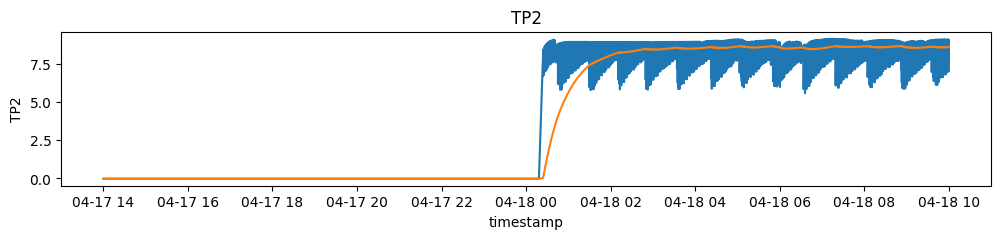

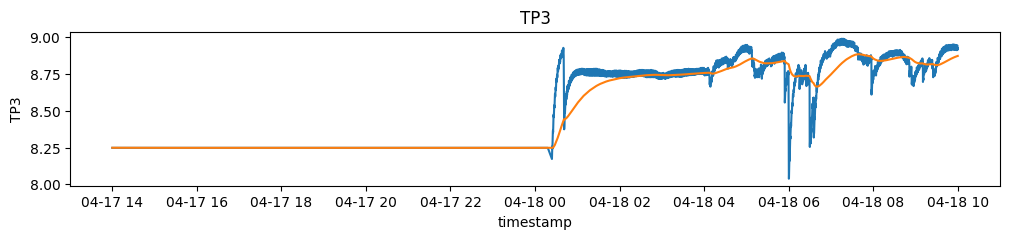

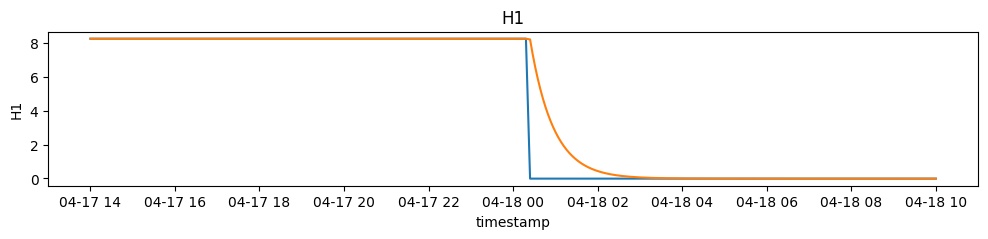

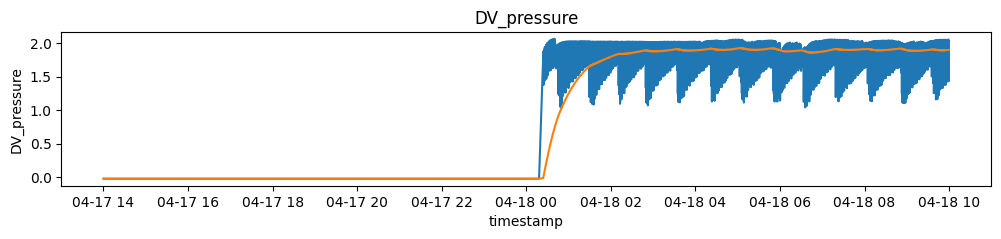

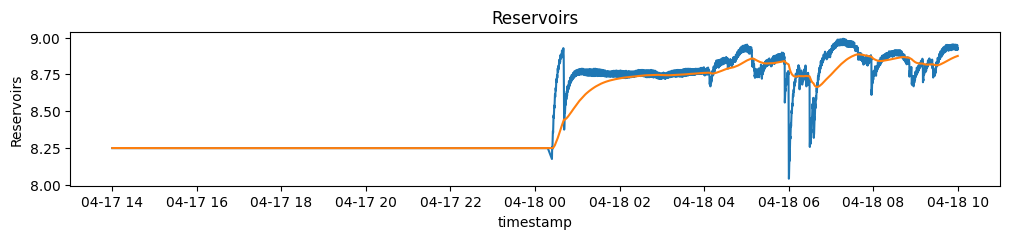

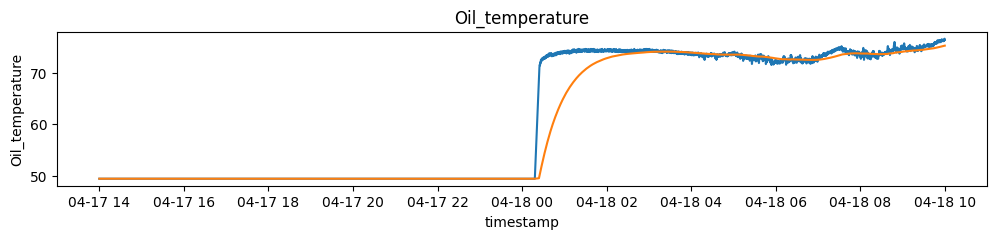

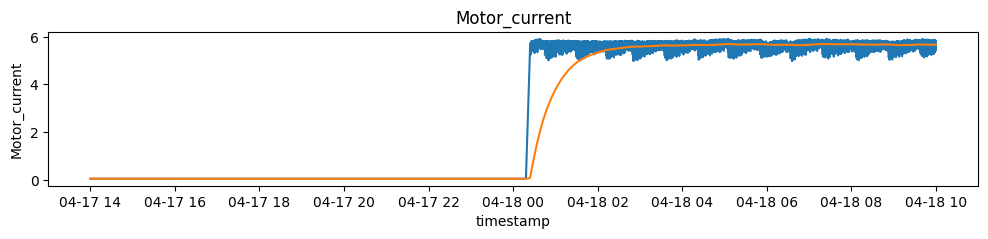

In [ ]:
for col in numerical_features:
    plot_range_smooth(col,failure_time[0][0],h=10)

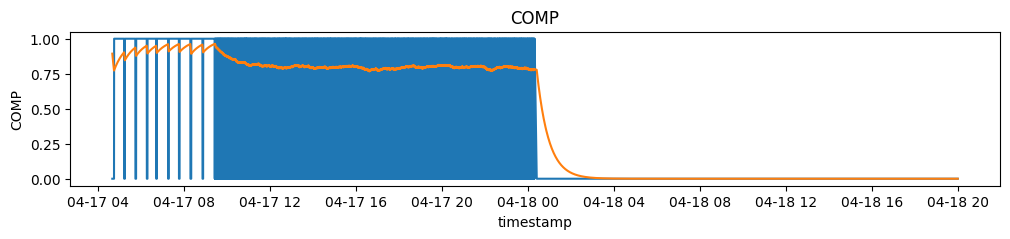

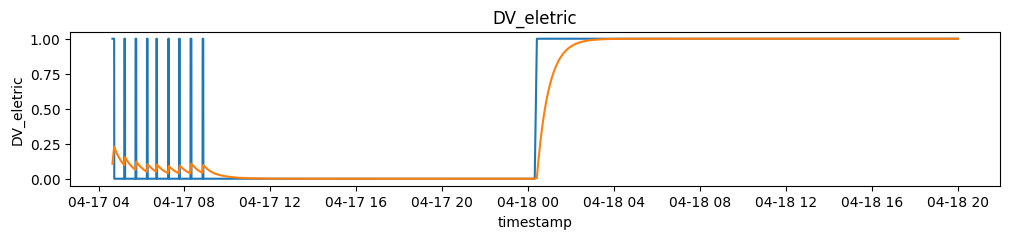

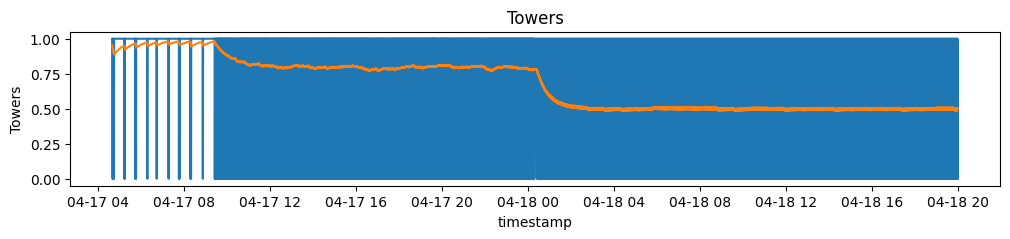

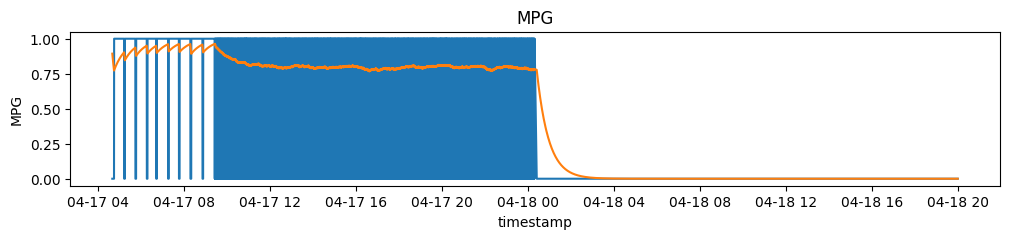

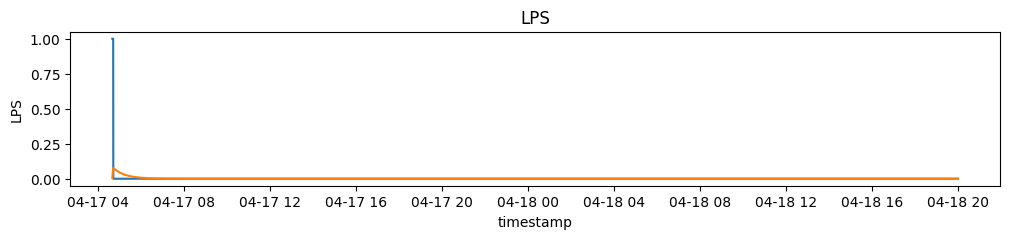

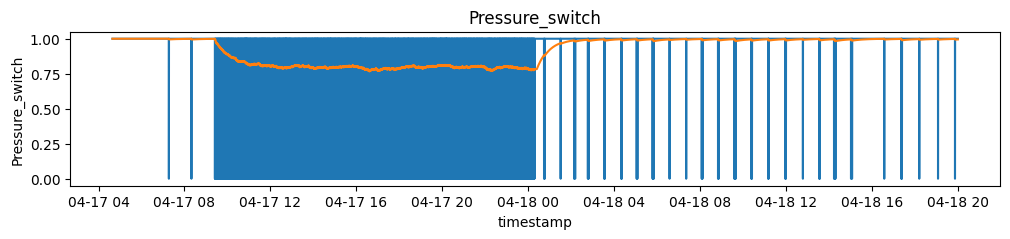

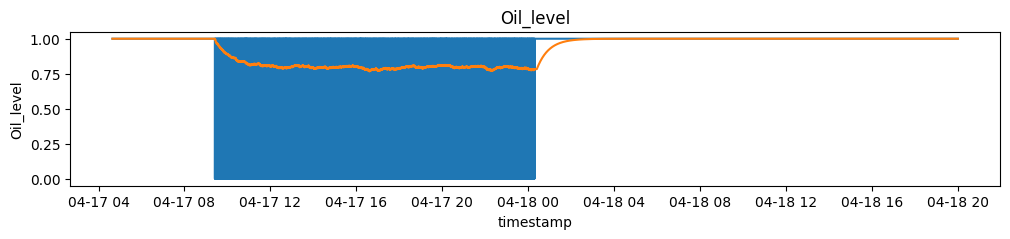

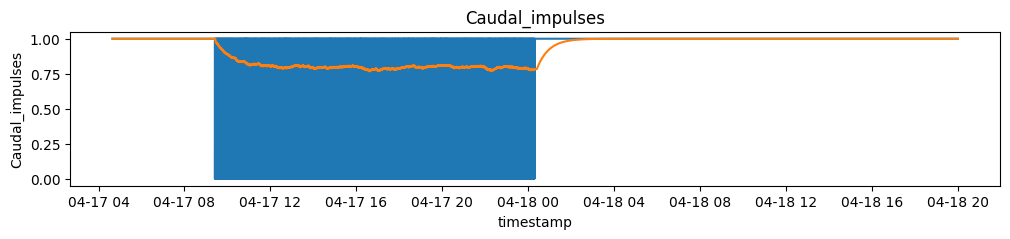

In [ ]:
for col in categorical_features:
    plot_range_smooth(col,failure_time[0][0],h=20)

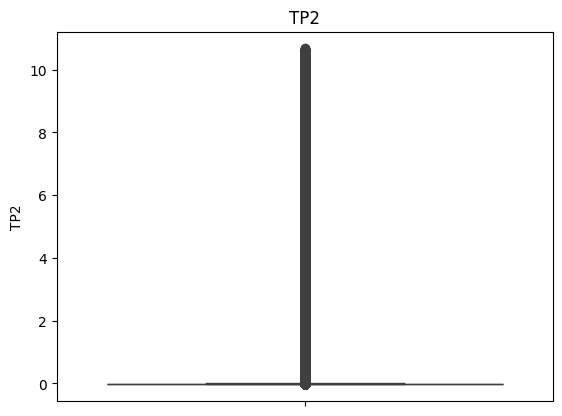

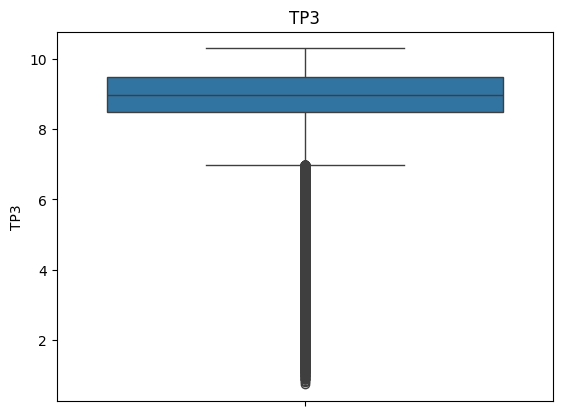

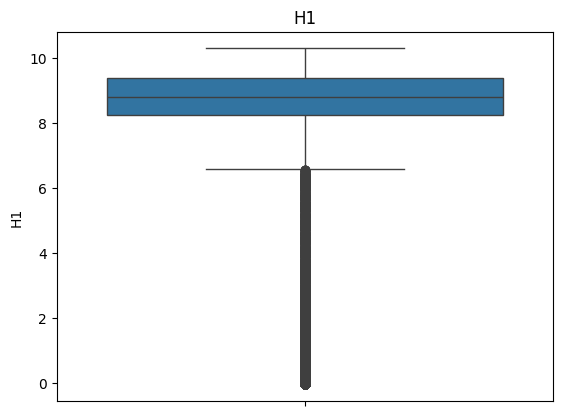

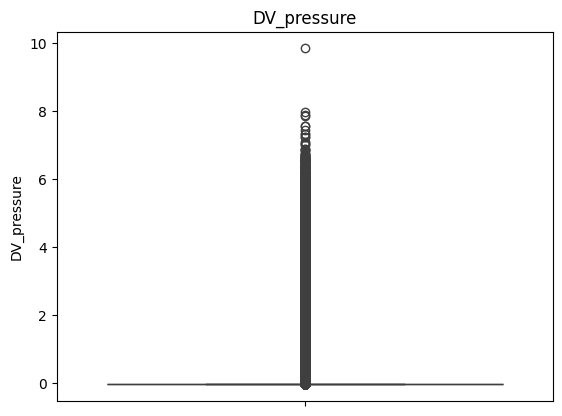

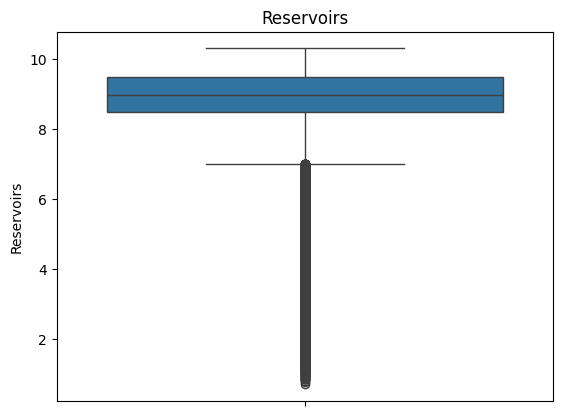

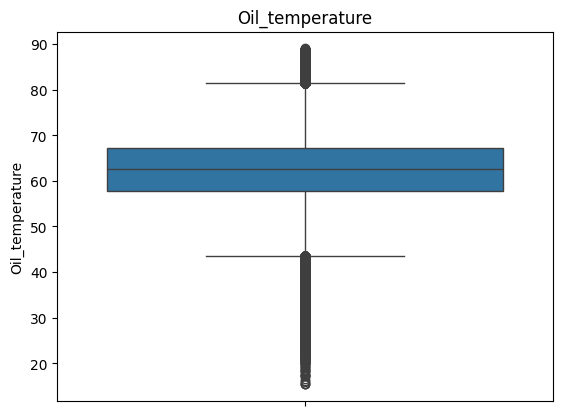

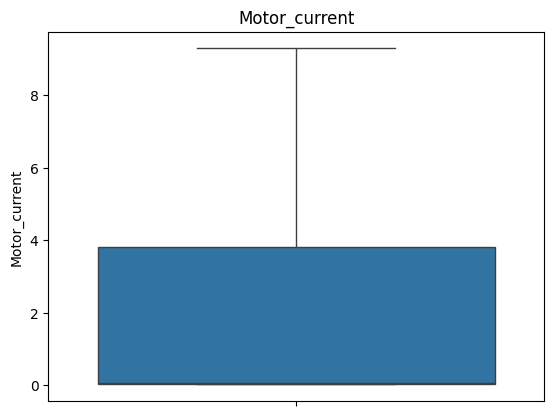

In [ ]:
for col in numerical_features:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

# Seperation of Input and output

In [ ]:
x = smooth_df.drop('status',axis=1)
y = smooth_df['status']

# Over sampling for avoiding imbalance

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

x_smote, y_smote = smote.fit_resample(x, y)

In [ ]:
y_smote.value_counts()

0    1486994
1    1486994
Name: status, dtype: int64

In [ ]:
over_sampled_df = pd.concat([x_smote,y_smote],axis=1)

<Axes: >

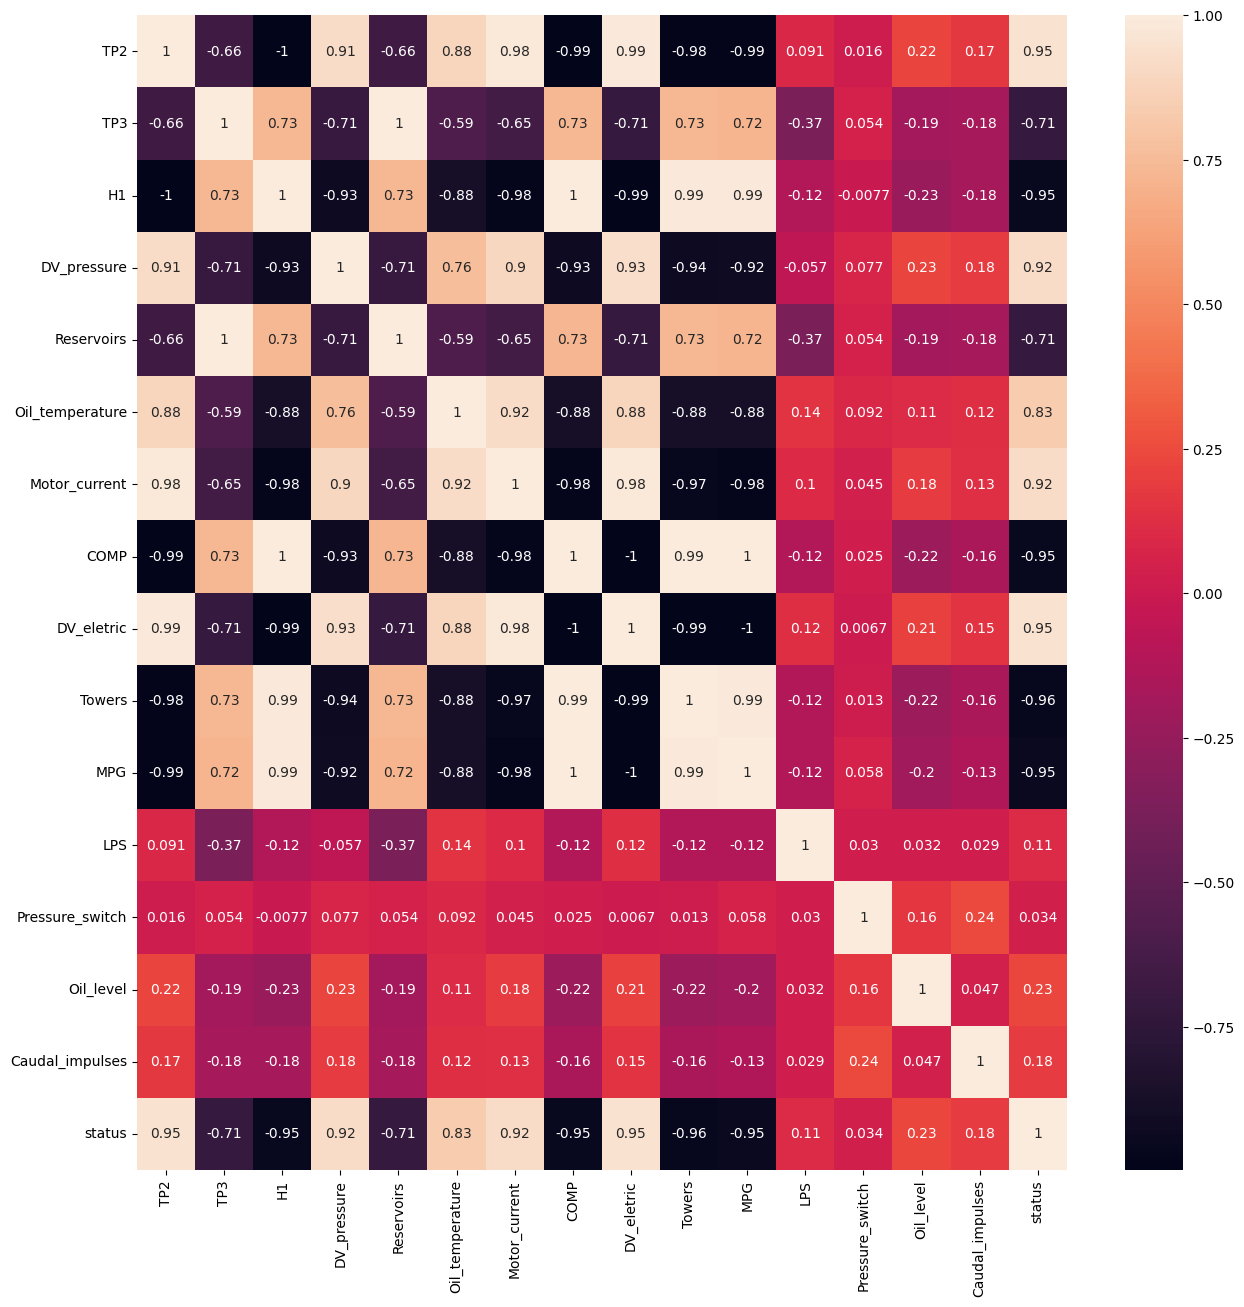

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(over_sampled_df.corr(), annot=True)

In [ ]:
x = over_sampled_df.drop('status',axis=1)
y = over_sampled_df['status']

# Sampling to reduce dataset

In [ ]:
x = x[::10]

In [ ]:
x.reset_index(inplace=True,drop=True)
x

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,-0.012000,9.358000,9.340000,-0.024000,9.358000,53.600000,0.040000,1.000000e+00,0.000000,1.000000,1.000000e+00,0.000000e+00,1.000000,1.0,1.0
1,-0.012548,9.306209,9.289847,-0.022912,9.306573,53.489738,0.040224,1.000000e+00,0.000000,1.000000,1.000000e+00,0.000000e+00,1.000000,1.0,1.0
2,-0.012573,9.253148,9.236772,-0.022855,9.253537,53.406287,0.039989,1.000000e+00,0.000000,1.000000,1.000000e+00,0.000000e+00,1.000000,1.0,1.0
3,-0.012651,9.199621,9.183441,-0.022837,9.199811,53.319084,0.040077,1.000000e+00,0.000000,1.000000,1.000000e+00,0.000000e+00,1.000000,1.0,1.0
4,-0.012901,9.145821,9.130109,-0.022828,9.146329,53.240037,0.039923,1.000000e+00,0.000000,1.000000,1.000000e+00,0.000000e+00,1.000000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297394,7.659351,7.739931,-0.008913,1.830079,7.740632,73.977224,5.493931,3.227127e-30,1.000000,0.499744,3.227127e-30,1.389444e-01,0.995740,1.0,1.0
297395,7.627828,7.735369,-0.009847,1.940677,7.736095,73.010970,5.481215,1.833517e-25,1.000000,0.499460,1.833517e-25,1.144722e-01,0.999300,1.0,1.0
297396,7.782127,7.890244,-0.005915,2.041389,7.892374,75.702893,5.457735,2.513916e-06,0.999997,0.500979,2.513916e-06,5.296410e-53,0.995426,1.0,1.0
297397,8.713230,8.911835,-0.008706,1.916101,8.912586,73.831913,5.692546,1.189476e-18,1.000000,0.499467,1.189476e-18,4.585345e-33,0.997835,1.0,1.0


In [ ]:
y = y[::10]

In [ ]:
y = y.reset_index(drop=True)
y

0         0
1         0
2         0
3         0
4         0
         ..
297394    1
297395    1
297396    1
297397    1
297398    1
Name: status, Length: 297399, dtype: int64

<Axes: >

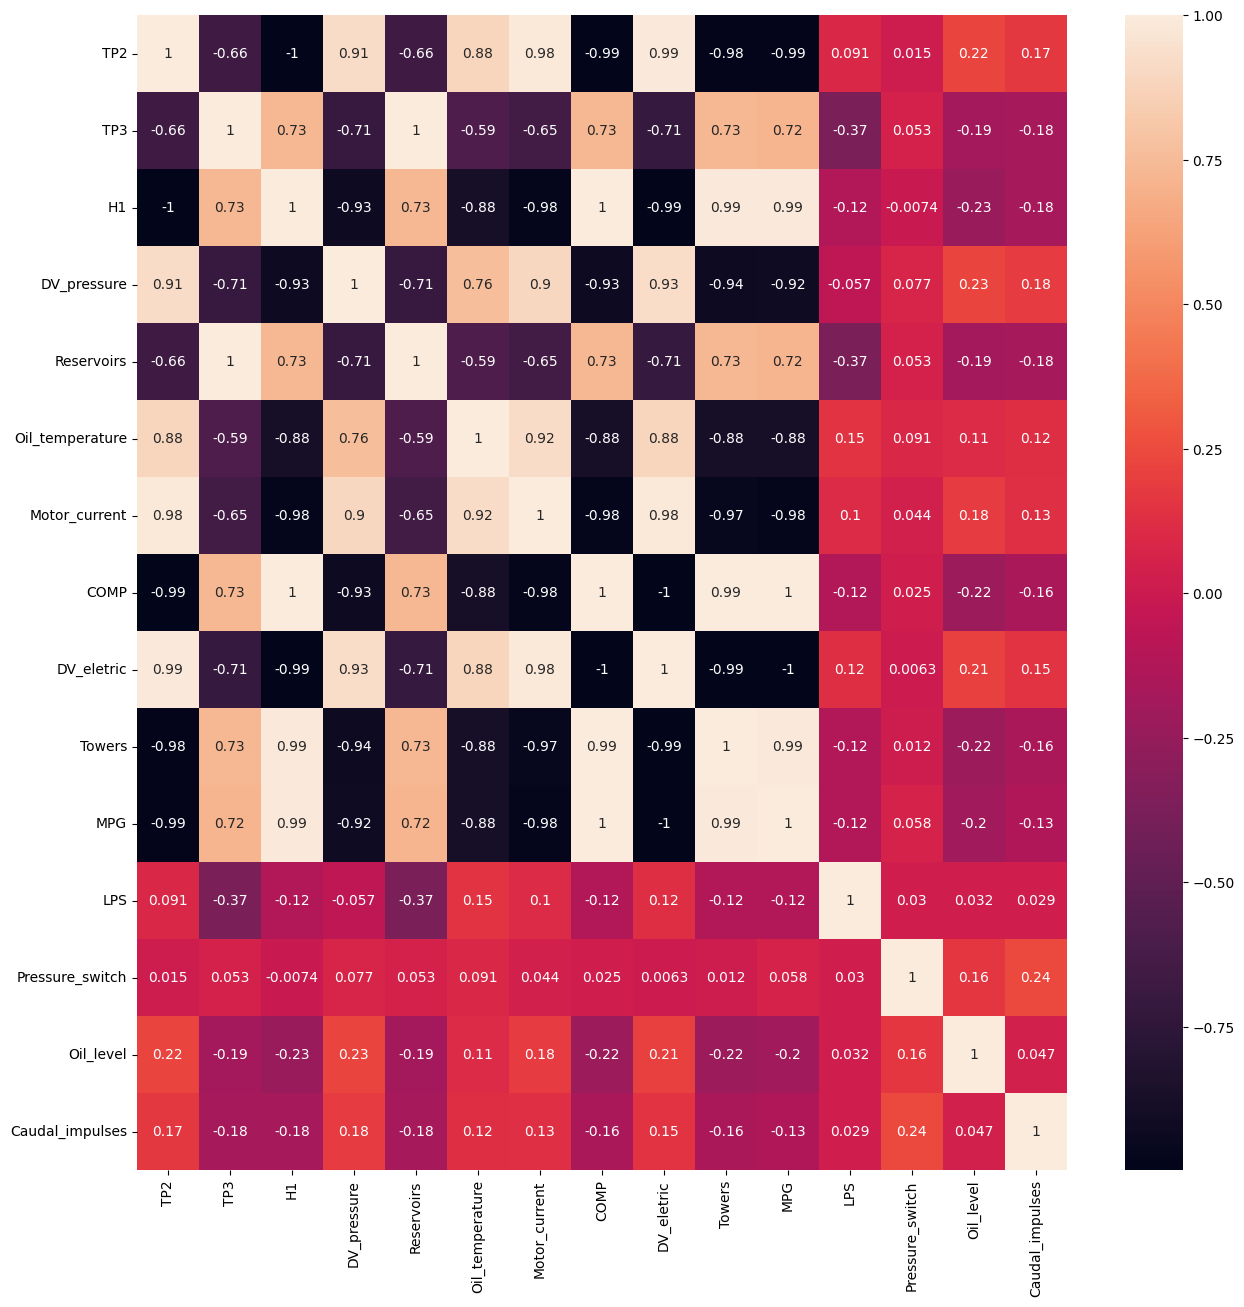

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(x.corr(),annot=True)

# Find Redundant Features

In [ ]:
def find_correlated_features(data,threshold):
    data_df = data.copy()
    data_df_cor = data_df.corr()
    features = set()
    for i in range(len(data_df.columns)):
        for j in range(i+1,len(data_df.columns)):
            f1 = data_df.columns[i]
            f2 = data_df.columns[j]

            val = data_df_cor.iloc[i,j]

            if abs(val)>threshold:
                features.add(data_df_cor.columns[j])

    return list(features)

In [ ]:
redundant_features = find_correlated_features(x,0.9)
redundant_features

['H1',
 'COMP',
 'Reservoirs',
 'Motor_current',
 'Towers',
 'DV_pressure',
 'MPG',
 'DV_eletric']

# Dropping Redundant Features

In [ ]:
x.drop(redundant_features,axis=1,inplace=True)

In [ ]:
x.shape

(297399, 7)

# Final Dataset

<Axes: >

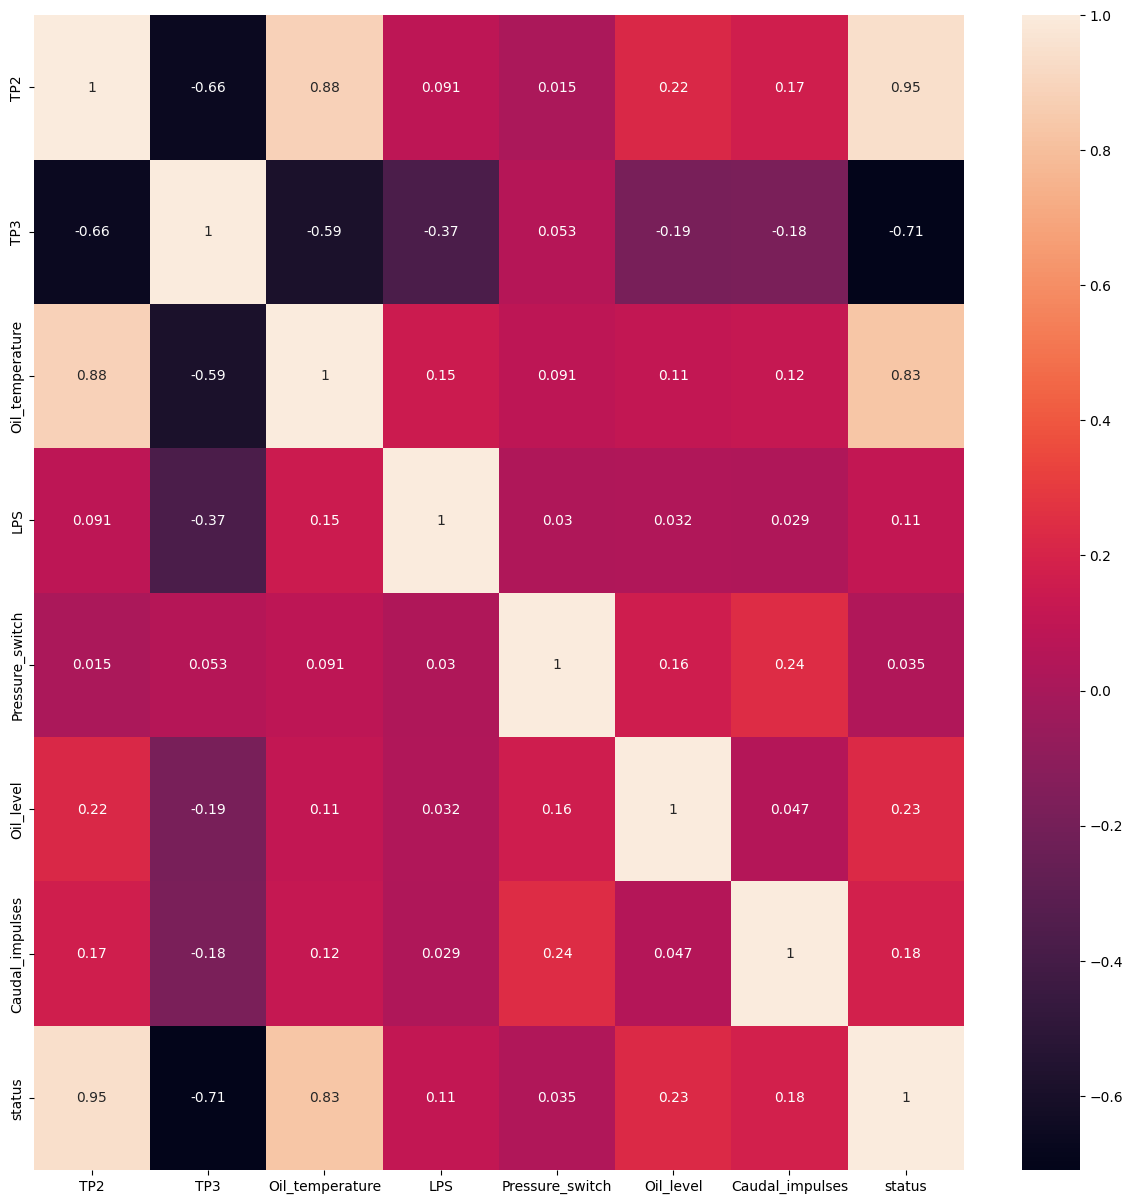

In [ ]:
final_df = pd.concat([x,y],axis=1)
plt.figure(figsize=(15,15))
sns.heatmap(final_df.corr(),annot=True)

In [ ]:
final_df

,TP2,TP3,Oil_temperature,LPS,Pressure_switch,Oil_level,Caudal_impulses,status
0,-0.012000,9.358000,53.600000,0.000000e+00,1.000000,1.0,1.0,0
1,-0.012548,9.306209,53.489738,0.000000e+00,1.000000,1.0,1.0,0
2,-0.012573,9.253148,53.406287,0.000000e+00,1.000000,1.0,1.0,0
3,-0.012651,9.199621,53.319084,0.000000e+00,1.000000,1.0,1.0,0
4,-0.012901,9.145821,53.240037,0.000000e+00,1.000000,1.0,1.0,0
...,...,...,...,...,...,...,...,...
297394,7.659351,7.739931,73.977224,1.389444e-01,0.995740,1.0,1.0,1
297395,7.627828,7.735369,73.010970,1.144722e-01,0.999300,1.0,1.0,1
297396,7.782127,7.890244,75.702893,5.296410e-53,0.995426,1.0,1.0,1
297397,8.713230,8.911835,73.831913,4.585345e-33,0.997835,1.0,1.0,1


In [ ]:
x = final_df.drop('status',axis=1)
y = final_df['status']

In [ ]:
x_values = x.values
y_values = y.values

In [ ]:
x.nunique()

TP2                295641
TP3                295398
Oil_temperature    295388
LPS                278443
Pressure_switch    296665
Oil_level           56639
Caudal_impulses     45942
dtype: int64

In [ ]:
y.value_counts()

1    148700
0    148699
Name: status, dtype: int64

# Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled_values = scaler.fit_transform(x_values)

# Train test split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled_values,y_values,test_size=0.3,random_state=42)

# Model creation

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


knn = KNeighborsClassifier(n_neighbors=11)
nb = GaussianNB()
svc = SVC()
rfc = RandomForestClassifier(random_state=42)
models = [knn,nb,svc,rfc]


**************************************************
KNeighborsClassifier(n_neighbors=11)
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44532
           1       1.00      1.00      1.00     44688

    accuracy                           1.00     89220
   macro avg       1.00      1.00      1.00     89220
weighted avg       1.00      1.00      1.00     89220

**************************************************
**************************************************
GaussianNB()
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     44532
           1       0.98      0.98      0.98     44688

    accuracy                           0.98     89220
   macro avg       0.98      0.98      0.98     89220
weighted avg       0.98      0.98      0.98     89220

*****************************************

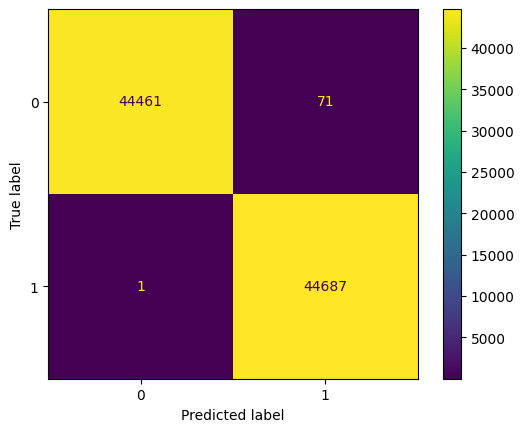

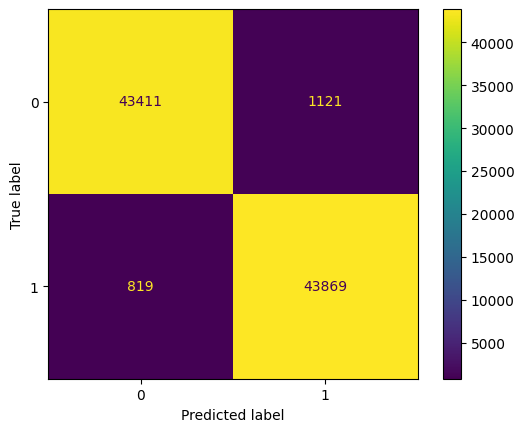

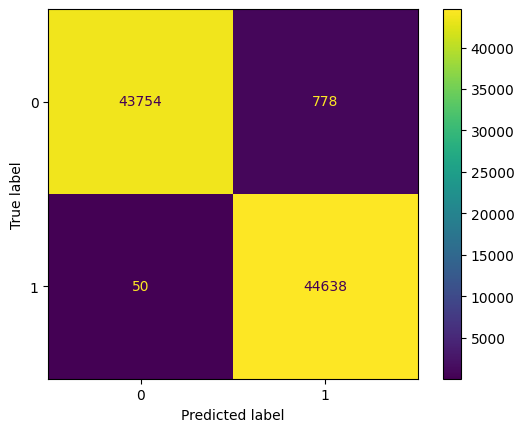

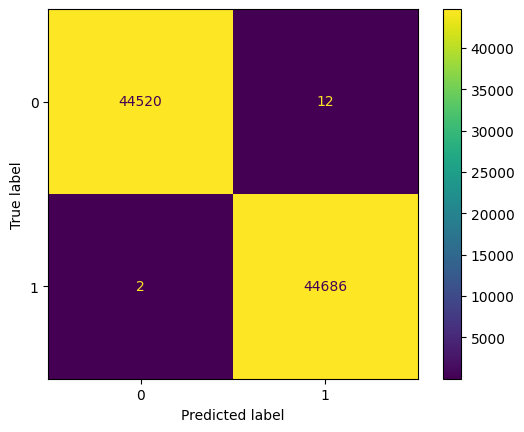

In [ ]:
for model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    report = classification_report(y_test,y_pred)
    cm = confusion_matrix(y_test,y_pred)

    print('*'*50)
    print(model)
    print('-'*50)
    print(report)
    print('*'*50)


    cmd = ConfusionMatrixDisplay(cm)
    cmd.plot()